# Import

!pip install numpy
!pip install pandas
!pip install nltk
!pip install tqdm
!pip install gensim
!pip install spacy
!pip install scikit-learn
!pip install matplotlib
!python -m spacy download en_core_web_lg

In [3]:
import numpy as np
import pandas as pd
import nltk
import tqdm
from nltk.corpus import stopwords
import re,string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import gc
import gensim
import collections
nlp = spacy.load('en_core_web_lg')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 500
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ysiberia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ysiberia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ysiberia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ysiberia\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
# фиксирую рэндом сид чтобы эксперименты были воспроизводимы
np.random.seed(31415)

In [223]:
df1=pd.read_excel('data/besprovodnaya_svyaz__0_95_classification_output.xlsx')

In [230]:
x=1 # 1 - целевой, 0,2 - мусорные
df1[['sentence','Bert_embed_K_means_3_clusters']][df1.Bert_embed_K_means_3_clusters==2] 

,sentence,Bert_embed_K_means_3_clusters
9,"The Ericsson Report 2019 estimates 2.6 billion 5G subscriptions globally by 2025, accounting for 29% of all mobile subscriptions at that time.",2
14,"As per a recent study, the internet user base in India has surpassed 500 million devices and is likely to touch 627 million by the end of 2020.",2
16,T-Mobile gained 2.12 million postpaid phone net customers in the first nine months of 2019 compared to 2.08 million net additions in the first nine months of 2018.,2
18,"AirPods sales almost doubled in 2019 to $6 billion and are expected to generate $15 billion in revenue in 2020, Bernstein analyst Toni Saccconaghi recently wrote in a note reported by CNBC.",2
20,"In particular, the penetration of 5G technology in Europe is estimated at 31% in 2025, which translates into 217 million connections.",2
28,"The number of users in the mobile games segment reached 1.36 billion in 2019, with 36% of them aged between 25 and 36.",2
29,"By 2022, over 700 million people are expected to have a smartphone in India, and over a billion devices will be sold over the next four-five years, he said.",2
38,The merger helped Vodafone Idea beat Reliance Jio and Airtel to become India’s largest telecom company with 408 million active subscribers and revenue market share of 32.2 per cent.,2
39,"Pokémon Go, an AR-based game by Niantic, last year registered a revenue of nearly $800 million from in-app purchases alone, which if roughly calculated is around $2.2 million per day.",2
41,"For example, Angry Birds bagged a revenue of $ 200 million and a user-base of 260 million in just two years of its launch.",2


In [234]:
y=1 # -1 скорее просто о состоянии рынка а не самом росте,0 - о росте, 1 скорее о падении
df1[['sentence','BERT_embed_DBSCAN_0.2_eps']][df1['BERT_embed_DBSCAN_0.2_eps']==y] 

,sentence,BERT_embed_DBSCAN_0.2_eps
3386,"were NIS 47 million (US$ 12 million) in Q4 2016, a decrease of 16% from NIS 56 million in Q4 2015.",1
3392,"Annual in 2016 totaled NIS 2,752 million (US$ 716 million), a decrease of 8% from NIS 2,992 million in 2015.",1
3393,"In 2016, were NIS 3,544 million (US$ 922 million), a decrease of 14% from NIS 4,111 million in 2015.",1
3395,"in 2016 were NIS 105 million (US$ 27 million), a decrease of 27% compared with NIS 143 million in 2015.",1
3396,"in Q4 2016 totaled NIS 498 million (US$ 130 million), a decrease of 9% from NIS 550 million in Q4 2015.",1
3397,"totaled NIS 45 million (US$ 12 million) in 2016, compared to NIS 47 million in 2015, a decrease of 4%, mainly reflecting a decrease in income from the unwinding of trade receivables.",1
3400,"in 2016 totaled NIS 834 million (US$ 217 million), a decrease of 5% from NIS 876 million in 2015.",1
3401,"For Q4 2016, operating profit was NIS 8 million (US$ 2 million), compared with operating loss of NIS 48 million in Q4 2015.",1
3403,"For Q4 2016, finance costs, net were NIS 23 million (US$ 6 million), a decrease of 41% compared with NIS 39 million in Q4 2015.",1
3404,"in 2016 totaled NIS 866 million (US$ 225 million), a decrease of 4% from NIS 906 million in 2015.",1


In [6]:
df2=pd.read_excel('data/vr_ar_classification_output.xlsx')

In [7]:
claster=0 # целевой, -1,1 мусорные
df2[['sentence','bow_embed_DBSCAN_0.4_eps']][df2['bow_embed_DBSCAN_0.4_eps']==claster] 

,sentence,bow_embed_DBSCAN_0.4_eps
16,Llamas hopes that VR will grow from $4.9 billion in 2019 to a diminished but still impressive revenue level of $13.7 billion by 2022.,0
18,"The research by XR Association noted that investment in AR and VR increased year-over-year, from over $2.5 billion in 2017 to USD $3.8 billion in 2018.",0
43,"In 2025, HMD shipments for enterprise VR use cases will reach more than 41 million (15.9 million smartphone HMDs, 2.6 million PC-based HMDs, and 22.7 million standalones).",0
46,"According to the report, the global artificial intelligence chip market garnered $4.51 billion in 2017 and is expected to reach $91.19 billion by 2025, registering a CAGR of 45.4% from 2018 to 2025. (",0
53,"For the most recent quarter (at the time of writing – fiscal Q4 2018) running up to and including September, the company took a total of $62.9 billion (around £50 billion, AU$88 billion) in revenue, up 20% year-on-year.",0
54,"On the computing front, Mac shipments were down very slightly (2%) at 5.3 million units in the quarter – compared to 5.4 million in Q4 the previous year – but those sales generated a revenue of $7.4 billion (around £5.9 billion, AU$10.3 billion), which was actually up 3% year-on-year.",0
58,And more power means more greenhouse gas emissions: American gamers emit about 12 million tons of carbon dioxide annually — the equivalent of about 2.3 million passenger cars.,0
71,"Prior to now, Varjo had raised around $15 million in funding, including an $8.2 million equity round last September and a follow-on $6.7 million debt tranche shortly after.",0
87,"The 6500 cost $8 million when it debuted, equal to $60.5 million in 2018.",0
94,Join the 20 million travelers worldwide who trust CityMaps2Go!,0


In [8]:
claster=2 # целевой, 0,1,3 - мусорные
df2[['sentence','Bert_embed_K_means_4_clusters']][df2['Bert_embed_K_means_4_clusters']==claster]

,sentence,Bert_embed_K_means_4_clusters
6,"Founded in 2016, the company has landed roughly $8 million in investment funding from Samsung NEXT, Mark Pincus, Kakao Ventures and others.",2
8,Do Intel and AMD have upside potential?Intel earns 75% of its revenue from PC and server CPU sales.,2
12,"While iPod sales accounted for 40% of Apple's revenue in 2006, according to the data, that figure steadily dropped starting in 2007 following the original iPhone's launch.",2
13,"By 2014, the last year Apple broke out iPod sales, the music player had accounted for just 1% of Apple's revenue, says Statista.",2
16,Llamas hopes that VR will grow from $4.9 billion in 2019 to a diminished but still impressive revenue level of $13.7 billion by 2022.,2
17,"He said his company’s AR revenues are about 7% of the total, and it’s growing about 90 percent a year, thanks to enterprise AR adoption for things like training and field work.",2
18,"The research by XR Association noted that investment in AR and VR increased year-over-year, from over $2.5 billion in 2017 to USD $3.8 billion in 2018.",2
34,Tablets comprise about 12% of purchases.,2
36,Tractica estimates the addressable market of the five largest areas where enterprise VR will grow is worth over $1 trillion in 2018.,2
40,"In 2017, Tractica estimated global revenue of $9.2 billion in 2021.",2


In [9]:
df3=pd.read_excel('data/neur_ai_classification_output.xlsx')  

In [10]:
claster = 0 # 0,2 - целевые, -1 и 1 мусорные
df3[['sentence','BERT_embed_DBSCAN_0.35_eps']][df3['BERT_embed_DBSCAN_0.35_eps']==claster]

,sentence,BERT_embed_DBSCAN_0.35_eps
15,The company’s revenue jumped at a CAGR (compound annual growth rate) of nearly 12% from 2015 to estimated revenue of $7 billion.,0
16,"According to figures from IHS Markit, China’s market expanded by 13.5% last year, whereas the global market — excluding China — grew by just 5%.",0
37,"The global intelligent vending market is projected to grow 17% over the next 4 years (Technavio) to $12.45 billion, with 40% of this growth coming from the Americas.",0
39,"According to its 2018 financial report, about 36 percent of the Shenzhen-listed company’s revenue came from abroad.",0
55,Services are expected to be between 15% and 20% of total revenue in 2019.,0
58,"Analyzing over 20 years of live chat transcripts, LivePerson found 69% of chats and calls could be handled quickly by bots, and Nielsen found 56% of online shoppers say they prefer to resolve issues through messaging apps than call customer service.",0
59,"Gartner predicts chatbots will power 85% of customer service interactions by next year, and 31% of marketers believe that virtual personal assistants will have more impact than any other AI technology.",0
67,"According to an IDC report, spending on AI systems will more than double to $79.2 billion1 in 2022 with a compound annual growth rate (CAGR) of 38.0% over 2018-2022 forecast period.",0
74,"According to reports, China’s spending on AI for technology and communication industry has increased to 71.6% during 2018 to reach $320 million.",0
85,"Average revenue per customer was approximately RMB 1.0 million, as compared to RMB 0.7 million the year before.",0


# Data

In [3]:
df = pd.read_excel('data/vr_ar_classification.xlsx')
df=df.drop(columns=['area','label','keywords_eng','pub_date','link','probability'],axis=1)
df.head()
out_path='data/vr_ar_classification_output.xlsx'
df=df.dropna(axis='index')
df['sentence'] = df['sentence'].astype("string")
print(df.info())

In [ ]:
df = pd.read_excel('data/besprovodnaya_svyaz__0_95_classification.xlsx')
df=df.drop(columns=['area','label','keywords_eng','pub_date','link','probability'],axis=1)
df=df.dropna(axis='index')
df['sentence'] = df['sentence'].astype("string")
print(df.info())
out_path='data/besprovodnaya_svyaz__0_95_classification_output.xlsx'  

In [ ]:
df = pd.read_excel('data/neur_ai_classification.xlsx')
df=df.drop(columns=['area','label','keywords_eng','pub_date','link','probability'],axis=1)
df=df.dropna(axis='index')
df['sentence'] = df['sentence'].astype("string")
print(df.info())
out_path='data/neur_ai_classification_out.xlsx'

# Preprocessing

In [4]:
gc.collect()
# переводим в нижний регистр, удаляем пунктуацию и цифры, заменяем знаки доллара и евро на слова. 
# удаляются двойные пробелы
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text= re.sub(r'%', ' percent ', text)
    text=re.sub('\$', ' dollar ', text)
    text=re.compile('<.*?>').sub(' ', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', ' ', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text)
    text = re.sub('\s+', ' ', text)  
    return text

In [5]:
# список неинформативных коротки слов которые раньше были аббревиатурой 
# или частным названием. осмысленные не включал bad', 'bag', 'bal', 'box', 'bug'
not_informative_short_words =['aaa', 'acc', 'abi', 'add', 'adt', 'aec', 'afp', 'ana', 'aol', 'apr', 'arc', 'ars', 'ash', 'atm',
                              'aud', 
                              'aug', 'avr', 'awp', 'bay', 'bbm', 'bcc', 'bci', 'ben', 'ble', 'bmi', 'boo', 'cad', 'cap', 'cbs', 
                              'ccd', 'ccp', 'ccs', 'cds', 'cee', 'ces', 'cfo', 'cgi', 'cis', 'cld', 'cns', 'cny', 'cpa', 'cta', 
                              'cto', 'cub', 'cup', 'daf', 'dan', 'daz', 'dci', 'ddr', 'dev', 'dew', 'dfc', 'dgx', 'dip', 'dlc', 
                              'dpb', 'dpi', 'dre', 'eap', 'ebt', 'eco', 'edr', 'eli', 'ems', 'eon', 'eos', 'epa', 'era', 'esa', 
                              'esi', 'etc', 'etf', 'evo', 'faa', 'fab', 'fax', 'fda', 'fed', 'fee', 'fig', 'fis', 'fla', 'fov', 
                              'gag', 'gcg', 'gdp', 'gfk', 'ghz', 'gic', 'glu', 'gos', 'gsm', 'gta', 'gtc', 'gtg', 'gtx', 'hai', 
                              'hbo', 'hed', 'hes', 'hfr', 'hlm', 'hlp', 'hmd', 'hmi', 'hon', 'htv', 'hub', 'hud', 'iab', 'iae', 
                              'ian', 'iap', 'ibd', 'ibm', 'ics', 'idc', 'idg', 'ifa', 'ign', 'igt', 'ihs', 'iii', 'imu', 'inc', 
                              'ind', 'int', 'ion', 'iot', 'ips', 'ise', 'isp', 'iss', 'ive', 'iyl', 'jio', 'jmi', 'jon', 'jun', 
                              'jwn', 'khz', 'kit', 'kwh', 'lab', 'lap', 'las', 'lbe', 'lcd', 'led', 'lgs', 'liu', 'low', 'lpm', 
                              'lrn', 'ltd', 'lte', 'lti', 'lux', 'mah', 'met', 'mhl', 'mid', 'mlg', 'mmo', 'mpg', 'mph', 'mrc', 
                              'mri', 'msc', 'msm', 'msv', 'nab', 'nba', 'nbc', 'nea', 'nfl', 'ngr', 'nov', 'nox', 'npd', 'nsf', 
                              'nsn', 'ntt', 'nuc', 'nzd', 'oak', 'oct', 'odv', 'oem', 'ohm', 'ooh', 'opi', 'opt', 'ore', 'org', 
                              'owc', 'par', 'pbr', 'pci', 'pcs', 'pct', 'phd', 'pic', 'plc', 'ppb', 'ppd', 'ppi', 'ppm', 'pre', 
                              'prn', 'pwc', 'qct', 'qqq', 'qsi', 'qtl', 'rec', 'rig', 'rim', 'rmb', 'roy', 'rpm', 'rtx', 'rue', 
                              'sad', 'sam', 'sas', 'sci', 'sek', 'shp', 'skf', 'sne', 'soc', 'spx', 'sqm', 'srp', 'stx', 'sub', 
                              'swp', 'tap', 'tcl', 'tel', 'tfe', 'thd', 'tim', 'tmr', 'tri', 'tvs', 'uav', 'ubi', 'uhd', 'uks', 
                              'usc', 'utm', 'uva', 'uvb', 'vcs', 'vfr', 'vic', 'von', 'vrd', 'vrs', 'vrx', 'wen', 'wii', 'win', 
                              'wow', 'wwe', 'wwf', 'xie', 'xlk', 'yaw', 'yoy', 'zhu', 'zvi',
                              'aal', 'aap', 'abb', 'abd', 'abp','abu', 'aci', 'acm', 'act', 'ada', 'adi', 'adl', 'adn', 'adr', 
                              'ads', 'aed', 'aeg', 'aep', 'aer', 'afr', 'agg', 'agm', 'agr', 'aha', 'ahs', 'aid', 'aii','ais',
                              'aka', 'ala', 'ali', 'alp', 'als', 'amc', 'ami', 'amn', 'amp', 'amr', 'amt', 'and', 'ant', 'anz',
                              'aok', 'api', 'app', 'aps', 'ari', 'asp', 'asu', 'asx', 'atc', 'ate', 'ati', 'atl', 'atp', 'att',
                              'atw', 'awd', 'aws', 'bac','bbb', 'bbc', 'bbk', 'bcd', 'bce', 'bch', 'bcs', 'bdt', 'beh', 'bet', 
                              'bhp', 'bia', 'bid', 'bif', 'big', 'bin', 'bip', 'bit', 'bli', 'bln', 'blu', 'bmo', 'bms', 'bmw',
                              'bns', 'bpd', 'bpi', 'bpo', 'bps', 'brl', 'bse', 'bss', 'btc', 'bts', 'btu', 'buf', 'bui','bwa', 
                              'byo', 'cae', 'caf', 'cak', 'cbp', 'ccg', 'cch', 'cci', 'ccl', 'cdc', 'cdn', 'cea', 'cem','cfe',
                              'cfs', 'cfu', 'cfx', 'cgo', 'cha', 'chd', 'chf', 'chi', 'chl', 'cho', 'chu', 'cia', 'cin', 'cio',
                              'cit', 'ckd', 'cle', 'clp',  'cmk', 'cmo', 'cmr', 'cms', 'cmt', 'cnb', 'cnc', 'cng', 'cnw', 'com',
                              'con', 'coo','co₂', 'cpc', 'cpe', 'cph', 'cpi', 'cps','cpv', 'cpw', 'crm', 'cry', 'cse', 'csl', 
                              'csm', 'csp', 'csr', 'css', 'cus', 'cut', 'cvc', 'cvg', 'cyn', 'czk', 'dab', 'dal', 'dam', 'das',
                              'dax',  'dbs', 'dcg', 'dcm', 'dda', 'ddh', 'ddt', 'dec', 'del', 'den', 'der', 'des', 'det', 'dft',
                              'dha', 'dhl', 'dhq', 'dig', 'div', 'diy', 'djb', 'dld', 'dlr', 'dmi', 'dmr', 'dna', 'dng', 'doe',
                              'dou', 'dow', 'dsc', 'dsl', 'dso', 'dsp', 'dtc', 'dth', 'dtl', 'dts', 'dtw', 'due', 'dug', 'duo',
                              'dvb',  'dvr', 'dxb', 'eas','ebs', 'eda', 'edm', 'edt', 'eee', 'ees', 'efb', 'egp', 'ehr', 'ehs',
                              'eia', 'eid', 'eir', 'emc', 'emd', 'emi', 'emt', 'emv', 'end', 'eno', 'ent', 'epc', 'epi',  'eqb',
                              'erc', 'ers', 'eso', 'est', 'etb', 'etd', 'ett', 'eur', 'eus', 'evf', 'evm', 'evs', 'ewj', 'ews',
                              'eye', 'fao', 'fat', 'fba', 'fca', 'fcc', 'fcf', 'fci', 'fcs', 'fdi', 'fdn', 'feb', 'fgw','flo',
                              'fly', 'fmc', 'fmi', 'fni', 'fon','fsa', 'fsi', 'fss', 'fst', 'ftc', 'ftr', 'fun', 'fwa', 'fxi', 
                              'gaa', 'gal', 'gan', 'gao', 'gba', 'gbe', 'gby', 'gcf', 'gee', 'gen', 'ges', 'get', 'gfg', 'ggv',
                              'ghg', 'ghs', 'gif', 'gig', 'giv', 'gla', 'gmt', 'gmv', 'gni', 'gnw', 'gpv', 'grm', 'gru', 'gsa',
                              'gsi', 'gsk', 'gst', 'gth', 'gtm', 'gto', 'gun', 'guo', 'gut', 'gva', 'gvt', 'gwe', 'gwh', 'gør',
                              'han', 'har', 'hat', 'hba', 'hbb', 'hcc', 'hcl', 'hdb', 'hdd', 'hdi', 'hdr', 'hdx', 'hem', 'hev', 
                              'hex', 'hey', 'hfc', 'hia', 'hip', 'hit','hkd', 'hkx', 'hlr', 'hns', 'hos', 'hou', 'hpc', 'hpe',
                              'hpj', 'hps', 'hrb', 'hrs', 'htc', 'hts', 'htt', 'hua', 'høy', 'iac', 'ibs', 'ibw', 'ica', 'icn',
                              'icp', 'ict', 'ida', 'idf', 'idh', 'idp', 'idx', 'ied', 'iee', 'ift', 'igr', 'igv', 'iia', 'iin', 'ijj',
                              'ill', 'imf', 'img', 'imo', 'ims', 'ina', 'ing', 'ink', 'inn', 'inr', 'ins', 'ioc', 'ioe', 'ios', 'ipc',
                              'ipd', 'ipo', 'ipr', 'ipv', 'ipx', 'iri', 'irs', 'isi', 'ism', 'itc', 'itm', 'itu', 'itv', 'iuc', 'iwd',
                              'iwf', 'iwr', 'iyt', 'izy', 'jam', 'jan', 'jet', 'jfk', 'jgp', 'jim', 'job', 'jpr', 'jpy', 'jqh', 'jsc',
                              'jui', 'jul', 'kan', 'kfc', 'kgi', 'kgs', 'kid', 'kik', 'kim', 'kkr', 'kla', 'klm', 'kmi', 'kms', 'km²',
                              'koa', 'kph', 'kpn', 'krw', 'kse', 'kts', 'kun', 'kuo', 'kva', 'kvh', 'kwd', 'laa', 'lag', 'lam', 'lan',
                              'lat', 'law', 'lay', 'lbs', 'lcc', 'lce', 'lco', 'lda', 'ldc', 'lee', 'les', 'let', 'lex', 'lgb', 'lie',
                              'lis', 'lla', 'llc', 'lmc', 'lmr', 'lng', 'log', 'loi', 'lok', 'los', 'lot', 'lpg', 'lps', 'lrs', 'lse', 
                              'lsi', 'lsp', 'lsr', 'ltm', 'lui', 'luk', 'lum', 'luo', 'lyf', 'lzo', 'lzt', 'mab',  'mag', 'man',
                              'map', 'mar', 'mat', 'mau','mbb', 'mbs', 'mbu', 'mca', 'mcd', 'mcm', 'mco', 'mdd', 'mdg', 'mdm', 'mdr', 'mea',
                              'med', 'mee', 'mem',  'meq', 'mfi', 'mhi', 'mhs', 'mhz', 'mic', 'mik', 'mil', 'mim',  'mio', 'mir', 'mis',
                              'mit', 'mix', 'mjn', 'mln', 'mms', 'mmt', 'mnf', 'mno', 'mnp', 'mod', 'mog', 'mom', 'mos', 'mou', 'moz',    
                              'mpa', 'mpc', 'mpd', 'mps', 'mrm', 'mro', 'mrp', 'msa', 'msi', 'msn', 'mss', 'mst', 'mtg', 'mtl', 'mtn', 'mts',
                              'mvp', 'mwc', 'mwh', 'máv', 'nas', 'nbn', 'ncr', 'nec', 'net', 'new', 'nfc', 'nff', 'nfv', 'ngh', 'nhk', 'nhn',
                              'nhs', 'nis', 'nok', 'non', 'npt', 'nre', 'nrf', 'nrg', 'nse', 'nsl', 'nsr', 'nsw', 'ntc', 'ntd', 'ntf', 
                              'ntp', 'ntv', 'nwe', 'nws', 'nxp', 'nxt', 'nyg', 'nyj', 'obd', 'obr', 'obs', 'ocf', 'och', 'ocs', 'odd',
                              'odm', 'oee', 'oes', 'ohb', 'oie', 'oil', 'old', 'one', 'ono', 'ons', 'ont', 'orc', 'oro', 'orr', 'osa',
                              'osk', 'ota', 'otc', 'ott', 'owe', 'oza', 'pac', 'pad', 'pan','pbs', 'pbx', 'pcb', 'pch', 'pcl', 'pcp',
                              'pds', 'pdv', 'peg', 'per', 'pet', 'pew', 'pgh', 'phe', 'phl', 'pie', 'pig', 'pin', 'pit', 'pkr', 'pla',
                              'pld', 'plm', 'pls', 'ply', 'pme', 'pnb', 'pod', 'pop', 'pos', 'pot', 'ppg', 'ppp', 'pps', 'ppv', 'prc',
                              'pro', 'prp', 'psg', 'psi', 'psy', 'pta', 'ptp', 'pts', 'pub', 'put', 'pvc', 'pyg', 'qad', 'qar',
                              'qcc', 'qfy', 'qhd', 'qnx', 'qoq', 'qvc', 'rac', 'raj', 'ram', 'ran', 'raw', 'ray', 'rba', 'rbc',
                              'rbi', 'rca', 'rcr', 'rcs', 'rda', 'rdd', 'red', 'ree', 'ren', 'rev', 'rex', 'rey', 'rgb', 'rgu', 
                              'rhi', 'rid', 'ril', 'rio', 'rkg', 'rmg', 'rmi', 'rmr', 'roa', 'roc', 'rod', 'roe', 'rog', 'roi',
                              'rom', 'ron', 'rov','rrb', 'rrh', 'rsa', 'rse', 'rsi', 'rtk', 'rub', 'run', 'rwc', 'saf', 'san',
                              'sao', 'sap', 'sar', 'sat','sba', 'sbc', 'sbi', 'sbo', 'sce', 'scs', 'sdg', 'sdn',
                              'sea', 'sec', 'see', 'sel', 'sen', 'sep', 'ses', 'set', 'sex', 'sfr', 'sgt', 'sgx', 'shy', 
                              'sia', 'sim', 'sis', 'sit', 'siy', 'ski', 'skm', 'skt', 'sky', 'slp', 'smb', 'sme', 'smg',
                              'smh', 'smk', 'smp', 'sms', 'smt', 'sns', 'soi', 'sol', 'som', 'son', 'sot', 'soy', 'spg',
                              'sph', 'spi', 'spy', 'sri', 'ssa', 'ssd', 'sse', 'ssl', 'ssm', 'std', 'stl', 'stp', 'sts',
                              'stv', 'suc', 'sud', 'sui', 'sum', 'sun', 'sur', 'suv', 'svp', 'svw', 'tab', 'tac', 'tad',
                              'tag', 'tal', 'tam', 'tan', 'tas',  'tbr', 'tbs', 'tcf', 'tcm', 'tco', 'tcs', 'tdd',
                              'tdi', 'tdk', 'tec', 'tek',  'ter', 'tex', 'tfa', 'tft', 'the', 'thz', 'tie', 'til', 
                              'tio', 'tip', 'tis', 'tls', 'tms', 'tom', 'ton', 'tpg', 'tpv', 'tpy', 'tre', 'try', 
                              'tsa', 'tse', 'tsr', 'tuc', 'tvb', 'tvc', 'twc', 'twh', 'two', 'txn', 'uae', 'uah', 
                              'ual', 'ubm', 'ubs', 'ucs', 'ufs', 'uhf', 'uhs', 'ulm', 'umc', 'und', 'une', 'upc', 
                              'upi', 'upm', 'ups', 'uqc', 'ure', 'usa', 'usb', 'usd', 'use', 'usf', 'uss', 'usv', 
                              'val', 'van', 'var', 'vas', 'vat', 'vdc', 'vdd', 'ver', 'vfc', 'vha', 'vhf', 'via',
                              'vil', 'vis', 'vnf', 'vni', 'voc', 'vod', 'vpn', 'vrf', 'vtr', 'vzw', 'wal', 'wan',
                              'wap', 'war', 'wav', 'wba', 'web', 'wed', 'wes', 'wet', 'wls', 'wos', 'wpc'
                              , 'wsj', 'wsn', 'wtg', 'www', 'xad', 'xfi', 'xia', 'xin', 'xlv', 'xmi', 'xps', 'xrp',
                              'xue', 'xzz', 'yds', 'yea', 'yen', 'yep','yfm', 'yin', 'ysa', 'ytd', 'yum', 'yun', 'zal',
                              'zee', 'zem', 'zte', 'zto',
                             'aao','abt', 'aca', 'acd', 'ach', 'ack', 'acl', 'acn', 'aco', 'acr', 'acs', 'acv', 'adb', 'adj', 'ado', 
                              'adp','aes', 'aet', 'afl', 'agc', 'agh', 'agi', 'agn','ags', 'agv', 'ahn', 'ahu', 'aig', 'alm', 'alt', 'ama',
                              'ame', 'aml', 'ams', 'amv', 'amy', 'anc','ann', 'aoc', 'aog', 'aon', 'aov', 'apa', 'apd', 'apl', 'apm', 'aqr',
                              'arr','asa', 'asc', 'asd', 'asm', 'asr', 'ata', 'atd', 'ato', 'auf', 'aum','avx', 'awe', 'axa', 'ayx', 'baa',
                              'bam', 'ban', 'bao', 'bar', 'bax', 'bba', 'bbl', 'bca', 'bcf', 'bcm', 'bct', 'bda', 'bdc',
                              'bdo', 'bds', 'bec','bep', 'bgc', 'bgf', 'bgr', 'bhi', 'bim', 'bio', 'bis', 'biu', 'biz', 'bjh', 'bjp',
                              'bjs', 'bkc', 'bkw', 'bls', 'bmc', 'bnp', 'bob', 'boe', 'bol','bpl', 'bpm', 'bpt', 'bra', 'bsa', 'bsi', 'bsv',
                              'bsx', 'bti', 'btl', 'bto', 'btw', 'bud', 'buz', 'bwc', 'cab', 'cac', 'cba', 'cbd', 'cbi', 'cbm', 'cca', 'ccb', 
                              'ccc', 'ccm', 'ccr', 'cdg', 'cdi', 'cdk', 'cdo', 'cdw', 'cdx', 'ceb', 'cec', 'cef', 'cel', 'cep', 'cet', 'cgm',
                              'cgn', 'che', 'cic', 'cke', 'cli', 'cma', 'cme', 'cmf', 'cmi', 'cml', 'cmu', 'cnk', 'cnn', 'cnt', 'cod', 'col',
                              'cor', 'cos','cpg', 'cpm', 'cpo', 'cpp', 'cpr', 'cpt', 'cpu', 'crc', 'cro', 'crv', 'csa', 'csd', 'csf', 'csi',
                              'cso', 'ctd', 'cti', 'ctr', 'cue', 'cuh', 'cvd', 'cvs', 'cwc', 'cxa', 'cxu', 'cys', 'dag', 'dai', 'dao', 'dau',
                              'dbr', 'dcc', 'dco', 'dcp', 'dds', 'dee', 'dei', 'dem', 'dfj', 'dfm', 'dhe', 'dia', 'dif', 'dik', 'dim', 'dkk', 
                              'dkr', 'dlp', 'dls', 'dmc', 'dme', 'dmf', 'dmg', 'dms', 'dnb', 'dnf', 'dno', 'doa', 'doc', 'dod', 'doi', 'doj',
                              'dos', 'dpm', 'dpu', 'drg', 'dss', 'dte', 'dtm', 'dto', 'dtt', 'dun', 'dup', 'dut','dvm', 'dvt', 'dxl', 'dye',
                              'eab', 'eam','ecj', 'ecm', 'ecs', 'edf', 'edp', 'eds', 'edu', 'eeg', 'eff', 'efm', 'egg', 'egm', 'ein', 'eiu',
                              'ekg', 'eld', 'elf', 'ema', 'emr', 'eps', 'erm', 'erp', 'erx', 'esd', 'esn', 'esp', 'eth', 'etl', 'eva', 'exa',
                              'ext', 'eys', 'faf','faq', 'far', 'fay', 'fbi', 'fbr', 'fdp', 'fep', 'fet', 'fft', 'fia', 'fin', 'fkf', 'fld',
                              'flg', 'flu', 'fos', 'fou','fpc', 'fpl', 'fps', 'frr', 'frs', 'fse', 'fsr', 'fte', 'ftk', 'ft³', 'fup', 'fyp',
                              'gac','gbi', 'gbp', 'gbs', 'gca', 'gcc', 'gel','ggr', 'ghk', 'gii', 'gle', 'glj', 'gma', 'gms', 'goa','gox', 'gpa',
                              'grc', 'grp', 'gsr', 'gsu', 'gsv', 'guy', 'gvc', 'gwp','hal', 'hbl', 'hbs', 'hci', 'hcm', 'hcq', 'hcs', 'hdl', 'hdp',
                              'hfn', 'hfo', 'hfs', 'hft', 'hhs', 'hie', 'hiv', 'hla', 'hmh', 'hmq', 'hmx', 'hny', 'hoc', 'hot', 'hrc', 'hrd', 'hsn',
                              'htf', 'htm', 'hue', 'hut', 'hvc', 'hya', 'hzb', 'hzi', 'ias', 'ibc', 'ibn', 'ibo', 'icc', 'icd','icf', 'ico', 'icu',
                              'icy', 'idm', 'ids', 'idw', 'ieg', 'ieo', 'ifr', 'ifs', 'ifx', 'igd', 'igm', 'ihc', 'ihl', 'iis', 'ijb', 'ile', 'ime',
                              'ini', 'inv', 'iod', 'iou', 'ipa', 'ipf', 'ipu', 'iqe', 'iqf', 'irc', 'ird', 'irr', 'isc', 'isg', 'ish', 'iso', 'ist',
                              'ito', 'iva', 'ivc', 'ivf', 'ivp', 'ivr', 'ivv', 'ivy', 'iwg', 'iwv', 'ixc', 'iyk', 'iyw', 'jaw', 'jda', 'jek', 'jft',
                              'jha', 'jhu', 'jit', 'jll', 'joe', 'jog', 'joy', 'jpl', 'kai', 'kar', 'kbr', 'ken','kia', 'koc', 'koh', 'kpa', 'kyc',
                              'lal', 'lau', 'lbp', 'lcs', 'ldl', 'len', 'leo', 'lev', 'lfw', 'lgp', 'lib', 'lip', 'lit', 'liv', 'liz', 'llp', 'lns',
                              'lol', 'lpd', 'lpo', 'lpt', 'ltl', 'ltv', 'luc', 'luz', 'léo','mba', 'mcg', 'mch', 'mcp', 'mcu', 'mcx', 'mdt', 'meg',
                              'mes', 'mfp', 'mgi', 'mgm', 'mig', 'min', 'mlb', 'mld', 'mmc', 'mmp', 'mol', 'moo', 'mov', 'moy', 'mpl','msh',
                              'mso', 'msp', 'msw', 'mtf', 'mtr', 'mtu', 'mtv', 'mud', 'mug', 'mum', 'mwe', 'mws', 'myo', 'myq', 'myr', 'nac',
                              'nam', 'nap', 'nav', 'nbj', 'nbv', 'ncm', 'ncs', 'ndp', 'ndr', 'ndt', 'nei', 'neo', 'neu', 'nev', 'nex', 'nfx',
                              'nga', 'ngc', 'ngi', 'ngo', 'ngp', 'ngs', 'nia', 'nic', 'nih', 'nil', 'nir', 'njm', 'nlp', 'nlu', 'nme', 'nmp',
                              'nmr', 'nmt', 'npa', 'npg', 'npr', 'nps', 'npu', 'npv', 'nra', 'nrm', 'nsa', 'nti', 'nut', 'nxj', 'nyc', 'oab',
                              'obn', 'oca', 'oda', 'ofr', 'oht', 'oig', 'oin', 'ola', 'ole', 'omb', 'opm', 'ops', 'osc', 'osi', 'oto','pag',
                              'pak', 'pal', 'pap', 'pas', 'pat', 'pau', 'pav','pcd', 'pce', 'pcu', 'pdc', 'pdf', 'pdm', 'pec', 'pep', 'pfd',
                              'pfe', 'pfi', 'pga', 'pgi', 'phi', 'php', 'phs', 'pii', 'pim', 'piv', 'pjc', 'pln', 'plp', 'pmi', 'pmp', 'pnc',
                              'pnr', 'poo', 'pou', 'ppa', 'ppl', 'ppo', 'prb', 'prm', 'prt', 'psa', 'psp', 'psr', 'pti', 'pty', 'pud', 'pus',
                              'pvd', 'pvo', 'pvs', 'pvt', 'qia', 'qrr', 'qsr', 'qts', 'que', 'rad', 'rao', 'ras','rcm', 'rct', 'ref', 'rei',
                              'rel', 'rem', 'rep', 'rfp', 'rgc', 'rhb', 'ria', 'ris', 'riv', 'rix', 'riz', 'rna', 'rnn', 'rnr', 'rop', 'row',
                              'rpa', 'rpc', 'rpx', 'rtb', 'rte', 'rti', 'rtl', 'rtp', 'ruh', 'rvx', 'rws', 'rxn','sbb', 'sbs', 'scm', 'scp', 
                              'sdi', 'sdk', 'sdl', 'sdm', 'seo', 'seu', 'sfc', 'sfi', 'sfm', 'sfn', 'sga', 'sha', 'shu', 'sic', 'sig', 'sip',
                              'six', 'ska', 'sku', 'sla', 'slb', 'sls', 'smx', 'snf', 'snr', 'soa', 'sob', 'sou', 'sow', 'sox', 'spf', 'spr',
                              'sps', 'sqe', 'sql', 'sqs', 'src', 'srm', 'sro', 'sst', 'stm', 'sto', 'sue', 'sul', 'svb', 'sve', 'svg', 'sya',
                              'syn', 'sys', 'tao', 'tav', 'tax', 'tay', 'tba', 'tbi', 'tca', 'tcp', 'tct', 'tcv', 'tdp', 'tea', 'ted', 'tem',
                              'teo', 'teu', 'tez', 'tfm', 'tgf', 'tha', 'thb', 'the', 'tif', 'tin', 'tka', 'tko', 'tma', 'tmp', 'tmt', 'tmv',
                              'tmw', 'tns', 'tnt', 'tnw', 'toc', 'toe', 'top', 'tor', 'tow', 'toy', 'tpd', 'tpm', 'tpu', 'trp', 'tru', 'tsi', 
                              'tsv', 'tsx', 'tth', 'tty', 'tvh', 'tvm', 'tvt', 'uas', 'ucc', 'ucl', 'udx', 'ugc', 'ugo', 'uhr', 'uia', 'ulg', 
                              'ull', 'umn', 'uns', 'url', 'uth', 'uto', 'uup', 'vbs', 'vca', 'vda', 'vde', 'vdw', 'vea', 'vec', 'vgb', 'vgg', 
                              'vie', 'vig', 'vii', 'vin', 'viv', 'viz', 'vku', 'vms', 'vos', 'vpa', 'vri', 'vrt', 'vte', 'way', 'wbt', 'wcs', 
                              'wee', 'wef', 'weo', 'wer', 'wfc', 'wfe', 'wfm', 'wfo', 'wit', 'wmo', 'wmt', 'wmw', 'wns', 'wpd', 'wpi', 'wpl', 
                              'wpp', 'wsi', 'wta', 'wti', 'wwt', 'xes', 'xgs', 'xlb', 'xly','xor', 'xpo', 'xrf', 'yap', 'yeo','yrd', 'yue', 'yug',
                              'yuk', 'zaf', 'zar', 'zen', 'zev', 'zip', 'zmr', 'zoo', 'zva', 'çok']


['dj','ar','xr','hz','au','mb','va','co','rs','xs','go','rr','db','ai','tb','os','mp','vs','vp','gb','rf','pm','ml','xp','px','ea','mm','kg','km','mi','hd','ds','ky','tv','ks','fb','hp','nm','ad','µm','sq','uk','bn','kw','cu','sv','th','st','la','sh','lg','ft','ii','ic','ct','vc','mn','xx','bi','id','cb','ap','du','qq','en','sg','ms','bb','pf','ag','li','ka','fy','mr','mc','gm','im','ts','wi','fi','ac','br','nr','av','cd','gp','fm','dr','ha','su','de','rd','xa','eu','sf','mw','oz','lb','ef','hs','wc','cm','ex','gt','gs','rg','bg','mt','je','ip','ed','ey','dc','lu','wu','ev']

In [6]:
# удаление английских частиц и предлогов.
all_stopwords = stopwords.words('english')
def delete_stop_words(string):
    text_tokens = word_tokenize(string)
    tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
    filtered_sentence = (" ").join(tokens_without_sw)
    return filtered_sentence

In [7]:
df['Clean_sentence']=df['sentence'].apply(lambda x: preprocess(x))
df['Clean_sentence']=df.Clean_sentence.apply(delete_stop_words)
#удаляем короткие слова в 2 символы
df['Clean_sentence']=df['Clean_sentence'].apply(lambda x:' '.join( [w for w in x.split() if len(w)>2]))
#удаляем неинформативные слова из списка выше
df['Clean_sentence']=df['Clean_sentence'].apply(lambda x:' '.join( [w for w in x.split() if w not in not_informative_short_words]))
df.head()

,sentence,Clean_sentence
0,"The X2 Pro charged unlike anything we’ve seen before, reaching a full 100% in just 30 minutes.",charged unlike anything seen reaching full percent minutes
1,Over 70% of people visit online casinos to play slots.,percent people visit online casinos play slots
2,"With a total of 200,000 gallons of water to float, soak and splash around in, a 60,000-square-foot expanded pool and deck area will feature 20 cabanas, 700 lounges and daybeds, two DJ booths and more.",total gallons water float soak splash around square foot expanded pool deck area feature cabanas lounges daybeds booths
3,VR headset shipments declined 50 per cent from 31 million units in 2017 to only 15 million units in 2018.,headset shipments declined cent million units million units
4,That’s essentially 88 per cent over the original Vive VR headset.,essentially cent original vive headset


In [8]:
  #  'communitiesnjfr', 'proceedingfacebook', 'communitybrands', 'marketaccording', 'researchinchina', 'contributionstensorflow', 'representatives', 'undernourishment', 'nanotechnologies', 'underhandedness', 'misidentification', 'shareblackberry', 'authentications', 'leveragedinitial', 'mobilethroughout', 'disproportionately', 'balasubramanian', 'implementations', 'biometricupdate', 'bioluminescence', 'retrotransposon', 'diversification', 'infrastructures', 'vulnerabilities', 'aroundveritasium', 'representational', 'konstantopoulos', 'ventriloquizing', 'unsettlingwherever', 'electrochemical', 'potentiostatically', 'electrospinning', 'differentiation', 'controlparticularly', 'photoprotection', 'radiopharmaceuticals', 'complyadvantage', 'cathodoluminescence', 'supercapacitors', 'nanoparticulate', 'advertisementadjusted', 'phacoemulsification', 'getelementsbytagname', 'popularapproximately', 'blepharoconjunctivitis', 'hyperpigmentation', 'pharmaceuticals', 'coadministration', 'betadataquantadatas', 'unsaponifiables', 'cyclohexylgriselimycin', 'microdermabrasion', 'recommendations', 'electrocatalyst', 'characteristics', 'worldwideenough', 'hexafluorophosphate', 'australopithecus', 'pathophysiology', 'reportsnreports', 'majorcytogenetic', 'cabozantinibarm', 'discontinuations', 'proteobacterium', 'crystallisation', 'environmentally', 'vascularization', 'supplementation', 'membranefiltered', 'ultrafiltration', 'exopolysaccharide', 'multituberculate', 'commercialization', 'palaeoanthropology', 'polyhexylthiophene', 'healthcarestudies', 'realistaccording', 'communitiesless', 'transparencymarketresearch', 'bioinformatician', 'representationword', 'geturlinsidetweet', 'tidytweetistanbul', 'geturlinsideretweet', 'advertisementbut', 'deploymentwhich', 'hospitalizations', 'extraordinarily', 'responsibilities', 'advertisementneither', 'translationalthough', 'advertisementover', 'confidentiality', 'interestflittos', 'advertisementrevenues', 'advertisementour', 'advertisementspam', 'enterprisesmarch', 'taikatranslations', 'highlightscorporatebaidu', 'advertisementinitial', 'advertisementaccording', 'advertisementvaluation', 'advertisementmeanwhile', 'advertisementlanguage', 'advertisementaround', 'translationrozetta', 'thrivedlifvergren', 'technologieshttps', 'kilgraycontactsandor', 'preprocessingthe', 'advertisementthis', 'advertisementinitially', 'advertisementfounded', 'partnersportola', 'advertisementsurveyed', 'discountfurthermore', 'employmentwhich', 'counterintuitive', 'underprivileged', 'advertisementhow', 'transformationindia', 'localgovernment', 'acquisitionsthe', 'everyoneaccording', 'journeydineouts', 'complementarity', 'transformational', 'franciscofacebook', 'implementationcreated', 'lendingcrowdthe', 'indiaautomotive', 'pricewaterhouse', 'personalisation', 'telecommunication', 'unapologetically', 'relationshipsmobile', 'popularityfacebook', 'nonprofitssourcechalk', 'procrastination', 'worldwidesource', 'internationally', 'alliedmarketresearch', 'environmentspeople', 'conclusionaccording', 'messengerfacebook', 'humansaccording', 'cryptocurrencies', 'developmentsecretive', 'humantelligence', 'interconnections', 'landscapeaccording', 'magazineaccording', 'videosaccording', 'businessinsider', 'fiercehealthcare', 'marketingmarketing', 'intelligenceallscripts', 'characterization', 'borsadelcredito', 'healthcareitnews', 'interestmaximize', 'educationvirtual', 'disintermediation', 'bankingaccording', 'returnersproving', 'databasefacebook', 'synchronisation', 'significantmobile', 'postcodeschinapyramid', 'penaltiesfacebook', 'kingdomratesetter', 'deliverabilityroughly', 'entrepreneurial', 'accountstwitter', 'americanexpress', 'competitiveness', 'businessaccording', 'advertisementgermanys', 'underrepresented', 'servicesinfrastructure', 'environmentshybrid', 'businessinsiders', 'edigitalresearch', 'zenithoptimedia', 'internationalsome', 'drivenprimarily', 'operationsintuit', 'fundingaustralian', 'personalizationprevious', 'millionwhatsapp', 'matchupsbroadcast', 'advertisementadvertisementnow', 'marketingaccording', 'advertisementin', 'changesprevious', 'milestonesfiretvamazon', 'purchaseswhilst', 'growthliulishuo', 'assistantsnuance', 'electrification', 'measurementsabout', 'marketstudyreport', 'reclassification', 'communicationmuch', 'transcriptionists', 'accomplishments', 'dissatisfaction', 'bundesnetzagentur', 'videoconferencing', 'smartphoneswith', 'clevelandclinic', 'biopharmaceutical', 'storyconnecticut', 'followsmeanwhile', 'unbankedwithout', 'cadburycraveyard', 'fivethirtyeight', 'possibilitiesbaidu', 'transparencyaccentures', 'advanceaccording', 'intelligencethe', 'entrepreneurship', 'optimizationsmobile', 'traditionalists', 'automationmeaning', 'revenuemediatek', 'interoperability', 'functionalities', 'infrastructuresoperators', 'informationphilips', 'caregiversbetter', 'discoverability', 'cryptocurrencyat', 'companiesamerican', 'advertisementroku', 'cherokeeengines', 'transmissionsall', 'intelligencecigna', 'powerwallswedish', 'intelligencehealth', 'josephpisanisign', 'newsletterscopyright', 'superpedestrians', 'advertisementlast', 'respondentsdouble', 'pessimistically', 'keeptheweatherchannel', 'entrepreneurism', 'reproducibility', 'informationebitda', 'algorithmically', 'marriottmarriottover', 'compareasiagroup', 'productsnonbook', 'turnoveramazons', 'bronchodilators', 'thefreshwatertrust', 'pharmacokinetic', 'physicochemical', 'azithromycinthe', 'bnamericasbrazilian', 'nongovernmental', 'hospitalization', 'powerhydroelectric', 'helsinkishanghai', 'industryaccording', 'automationplatforms', 'cybercriminalslaunch', 'underemployment', 'siriusdecisions', 'planningaccording', 'transformations', 'expensessubsidies', 'incomeoperating', 'resultsrevenuesin', 'expensesselling', 'projectionswall', 'intrapreneurship', 'hotpaperlantern', 'automationautomation', 'octoberbetterhalf', 'accesshealthcare', 'ascensionventures', 'opinionsmanagement', 'increasednumber', 'centidentifying', 'leaderscompanies', 'salaryfinancethe', 'securitizations', 'professionsincluding', 'accountingeliminated', 'technologieswith', 'immunohistochemistry', 'securitysolutions', 'centralgovernment', 'incidentsinvolved', 'companiesincreasingly', 'fraudulenttransactions', 'musculoskeletal', 'intelligencewhen', 'bestblackfriday', 'instrumentation', 'acquisitionunder', 'intelligenceportals', 'companiescompany', 'increaserevenue', 'neuromodulation', 'rehospitalization', 'standardization', 'administrations', 'familienversicherung', 'connectivitynokia', 'informationsaid', 'vulnerablespend', 'maintenanceaccording', 'connectionsresponded', 'trendsanalytics', 'researchnreports', 'notwithstanding', 'criminalization', 'ineffectiveness', 'accenturestrats', 'experiencesforty', 'uniontransferwise', 'hyperspecialization', 'problematically', 'htfmarketreport', 'zionmarketresearch', 'innovationcited', 'enginestotaling', 'orderconversely', 'profitgenerator', 'improvementdespite', 'ultimarketingweb', 'playersincluding', 'programmatically', 'assistancealthough', 'correspondingly', 'businesscustomers', 'deathcardiovascular', 'administratives', 'synchronization', 'pinnaclepushing', 'microtransaction', 'eyefortransport', 'productselastic', 'surfacesincluding', 'fieldsreplacing', 'financialsfirst', 'analyticsalmost', 'facebookconnectivitythe', 'cannibalization', 'financialsfacebooks', 'capitalpredicted', 'customersdelivering', 'fiercehealthpayer', 'pricewatershousecooper', 'platformmachine', 'trillionbasically', 'environmentshave', 'thorvaldsdottir', 'neijenslandsvirkjun', 'hospitalisations', 'blockingpagefair', 'realityconversely', 'underperforming', 'productseverything', 'institutionalisation', 'conclusionpositiverevenue', 'interactionspurchases', 'computationally', 'billionrepresenting', 'madisonvaccines', 'glaxosmithkline', 'thehalifaxgroup', 'appliedproteomics', 'maturesignificantly', 'renewableenergyworld', 'revolutionanalytics', 'proteusdigitalhealth', 'devicescurrently', 'gastrointestinal', 'characterizations', 'recapitalization', 'interradmedical', 'biopharmaceuticals', 'smartdatacenter', 'scientificconservation', 'neurotechnology', 'philanthropists', 'superconducting', 'advertisementteslas', 'profileprofessor', 'francisprofessorsir', 'electromagnetic', 'membersaccording', 'neuroprosthesis', 'colibasanujapans', 'electroencephalography', 'desertification', 'neurobiological', 'transplantation', 'personaltypically', 'epidemiological', 'neurophysiology', 'nasopharyngitis', 'incobotulinumtoxina', 'prolongedaffects', 'bupivacaineinjections', 'reduceddependence', 'hypersensitivity', 'anddipyridamole', 'atherosclerotic', 'dextromethorphan', 'psychopathology', 'neuroprosthetics', 'rehospitalizations', 'echocardiography', 'lacerationintentional', 'reinterventions', 'revascularization', 'anticoagulation'

In [9]:
# замена больших слов, полученных изза ошибок на несколько слов.
def preprocess_words(text):
    text = text.lower()
    text= re.sub('centralgovernment', 'central government', text)
    text= re.sub('incidentsinvolve', 'incidents involve', text)
    text= re.sub('mobilethroughout', 'mobile throughout', text)
    text= re.sub('biometricupdate', 'biometric update', text)
    text= re.sub('advertisementadjuste', 'advertisement adjuste', text)
    text= re.sub('capitalpredicte', 'capital predicte', text)
    text= re.sub('facebookconnectivitythe', 'facebook connectivity the', text)
    text= re.sub('financialsfirst', 'financials first', text)
    text= re.sub('financialsfacebook', 'financials facebook', text)
    text= re.sub('researchnreport', 'research n report', text)
    text= re.sub('accesshealthcare', 'access health care', text)
    text= re.sub('proteusdigitalhealth', 'proteus digital health', text)
    text= re.sub('renewableenergyworld', 'renewable energy world', text)
    text= re.sub('blockingpagefair', 'blocking page fair', text)
    text= re.sub('thesupermariobro', 'the supermario bro', text)
    text= re.sub('basicsmessenger', 'basics messenger', text)
    text= re.sub('communitybrands', 'community brands', text)
    text= re.sub('contributionstensorflow', 'contributions tensorflow', text)
    text= re.sub('opinionsmanagement', 'opinions management', text)
    text= re.sub('increasednumber', 'increased number', text)
    text= re.sub('salaryfinancethe', 'salary finance the', text)
    text= re.sub('securitysolution', 'security solution', text)
    text= re.sub('reduceddependence', 'reduced dependence', text)
    text= re.sub('bupivacaineinjection', 'bupivacaine injection', text)
    text= re.sub('hypersensitivity', 'hyper sensitivity', text)
    text= re.sub('membersaccording', 'members according', text)
    text= re.sub('francisprofessorsir', 'francis professors ir', text)
    text= re.sub('profileprofessor', 'profile professor', text)
    text= re.sub('advertisementtesla', 'advertisement tesla', text)
    text= re.sub('scientificconservation', 'scientific conservation', text)
    text= re.sub('respondentsdown', 'respondents down', text)
    text= re.sub('chatbotfacebook', 'chatbot facebook', text)
    text= re.sub('beforetrademark', 'before trademark', text)
    text= re.sub('marketresearchhub', 'market research hub', text)
    text= re.sub('heavyweightshive', 'heavy weights hive', text)
    text= re.sub('conclusioncitron', 'conclusion citron', text)
    text= re.sub('manufacturingwhich', 'manufacturing which', text)
    text= re.sub('globalfoundries', 'global foundries', text)
    text= re.sub('advertisementgoldman', 'advertisement goldman', text)
    text= re.sub('technologyeverything', 'technology everything', text)
    text= re.sub('coherentmarketinsights', 'coherent market insights', text)
    text= re.sub('advertisementmore', 'advertisement more', text)
    text= re.sub('breakdowndownload', 'break downdownload', text)
    text= re.sub('growthaccording', 'growth according', text)
    text= re.sub('technologytiktok', 'technology tiktok', text)
    text= re.sub('proceedingfacebook', 'proceeding facebook', text)
    text= re.sub('technologysmartphone', 'technology smartphone', text)
    text= re.sub('technologiesresearch', 'technologies research', text)
    text= re.sub('tesseraholdingcorporation', 'tessera holding corporation', text)
    text= re.sub('advertisementoverall', 'advertisement overall', text)
    text= re.sub('oldershausenmoving', 'olders haus enmoving', text)
    text= re.sub('downtimereduction', 'downtime reduction', text)
    text= re.sub('researchandmarket', 'research and market', text)
    text= re.sub('marketsandmarket', 'markets and market', text)
    text= re.sub('declarationduring', 'declaration during', text)
    text= re.sub('qualityexperience', 'quality experience', text)
    text= re.sub('summarycomputing', 'summary computing', text)
    text= re.sub('alliancebernstein', 'alliance bernstein', text)
    text= re.sub('crystaldiskmark', 'crystal diskmark', text)
    text= re.sub('marketandmarket', 'market and market', text)
    text= re.sub('jbknowledge\u200b', 'knowledge', text)
    text= re.sub('qualcomm\x92s', 'qualcomm', text)
    text= re.sub('jvckenwood', 'kenwood', text)
    text= re.sub('broad\xadcast', 'broadcast', text)
    text= re.sub('informationstored', 'information stored', text)
    text= re.sub('facebookalthough', 'facebook although', text)
    text= re.sub('advertisementthe', 'advertisement the', text)
    text= re.sub('playstationnetwork', 'playstation network', text)
    return text

In [10]:
df['Clean_sentence']=df['Clean_sentence'].apply(lambda x: preprocess_words(x))

# Lemmatizing  
я сторонник лемматизации текстов (перевод в начальную форму)
Считаю что стемминг это для бедных))

## nltk

In [11]:
lemmatizer = WordNetLemmatizer()

In [12]:
example=df.iloc[13,1]
print(example)
lemmatized_output = " ".join([lemmatizer.lemmatize(w) for w in example.split()])
print(lemmatized_output)

last year apple broke ipod sales music player accounted percent apple revenue says statista
last year apple broke ipod sale music player accounted percent apple revenue say statista


In [13]:
df['Clean_sentence_lemm_nltk']=df['Clean_sentence'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.split()]))

In [14]:
df.head()

,sentence,Clean_sentence,Clean_sentence_lemm_nltk
0,"The X2 Pro charged unlike anything we’ve seen before, reaching a full 100% in just 30 minutes.",charged unlike anything seen reaching full percent minutes,charged unlike anything seen reaching full percent minute
1,Over 70% of people visit online casinos to play slots.,percent people visit online casinos play slots,percent people visit online casino play slot
2,"With a total of 200,000 gallons of water to float, soak and splash around in, a 60,000-square-foot expanded pool and deck area will feature 20 cabanas, 700 lounges and daybeds, two DJ booths and more.",total gallons water float soak splash around square foot expanded pool deck area feature cabanas lounges daybeds booths,total gallon water float soak splash around square foot expanded pool deck area feature cabana lounge daybed booth
3,VR headset shipments declined 50 per cent from 31 million units in 2017 to only 15 million units in 2018.,headset shipments declined cent million units million units,headset shipment declined cent million unit million unit
4,That’s essentially 88 per cent over the original Vive VR headset.,essentially cent original vive headset,essentially cent original vive headset


## spacy

In [16]:
nlp = spacy.load('en_core_web_lg')
example=df.iloc[13,1]
print(example)
doc=nlp(example)
lemmatized_output = " ".join([token.lemma_ for token in doc])
print(lemmatized_output)

last year apple broke ipod sales music player accounted percent apple revenue says statista
last year apple break ipod sale music player account percent apple revenue say statista


In [17]:
df['Clean_sentence_lemm_spacy']=df['Clean_sentence'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))

In [18]:
df.head()

,sentence,Clean_sentence,Clean_sentence_lemm_nltk,Clean_sentence_lemm_spacy
0,"The X2 Pro charged unlike anything we’ve seen before, reaching a full 100% in just 30 minutes.",charged unlike anything seen reaching full percent minutes,charged unlike anything seen reaching full percent minute,charge unlike anything see reach full percent minute
1,Over 70% of people visit online casinos to play slots.,percent people visit online casinos play slots,percent people visit online casino play slot,percent people visit online casino play slot
2,"With a total of 200,000 gallons of water to float, soak and splash around in, a 60,000-square-foot expanded pool and deck area will feature 20 cabanas, 700 lounges and daybeds, two DJ booths and more.",total gallons water float soak splash around square foot expanded pool deck area feature cabanas lounges daybeds booths,total gallon water float soak splash around square foot expanded pool deck area feature cabana lounge daybed booth,total gallon water float soak splash around square foot expand pool deck area feature cabana lounge daybed booth
3,VR headset shipments declined 50 per cent from 31 million units in 2017 to only 15 million units in 2018.,headset shipments declined cent million units million units,headset shipment declined cent million unit million unit,headset shipment decline cent million unit million unit
4,That’s essentially 88 per cent over the original Vive VR headset.,essentially cent original vive headset,essentially cent original vive headset,essentially cent original vive headset


лемматизация spacy проходит лучше. Сравнивал методом пристального взгляда пролистывая тексты. потому дальше будет использоваться вариант от spacy

## Clean bad splitted words  
Это необязательный этап. тут я искал слишком длинные слова и слишком короткие, оставшиеся после лемматизации и препроцессинга

In [19]:
collection1=collections.Counter([y for x in df.Clean_sentence_lemm_spacy.values.flatten() for y in x.split()])

In [20]:
word_len={}
for x in collection1.items():
    word_len[x[0]]=len(x[0])

In [21]:
long_words=[]
for pair in  word_len.items():
    if pair[1]>=15 and pair[1]<30:
        long_words.append(pair[0])

In [22]:
df[df['Clean_sentence_lemm_spacy'].str.contains('pricewaterhouse')]

,sentence,Clean_sentence,Clean_sentence_lemm_nltk,Clean_sentence_lemm_spacy


In [23]:
print(long_words)

['reclassification', 'indistinguishable', 'telecommunication', 'representational', 'trackerprevious', 'telecommunications', 'intercontinental', 'acknowledgement', 'characterization', 'interoperability', 'commercialisation', 'differentiation', 'physiotherapist', 'musculoskeletal', 'electromyography', 'financialsadobe', 'driversebastian', 'htfmarketreport', 'glaxosmithkline', 'ophthalmologist', 'internationally', 'microcontroller']


In [24]:
len(long_words)

22

In [25]:
short_words=[]
for pair in  word_len.items():
    if pair[1]<=3:
        short_words.append(pair[0])

In [26]:
short_words=sorted(short_words)
print(short_words)

['abc', 'act', 'add', 'age', 'ago', 'aid', 'aim', 'air', 'amd', 'and', 'app', 'arm', 'art', 'ask', 'bad', 'bag', 'bar', 'bat', 'bet', 'big', 'bit', 'bot', 'box', 'boy', 'bus', 'buy', 'cap', 'car', 'cat', 'ceo', 'cio', 'cpu', 'cue', 'cut', 'day', 'ddo', 'def', 'die', 'dim', 'do', 'dog', 'dot', 'dry', 'dvd', 'ear', 'eat', 'egg', 'end', 'eve', 'eye', 'fan', 'fee', 'few', 'fit', 'fix', 'fly', 'fog', 'fox', 'gap', 'gas', 'geo', 'get', 'gif', 'go', 'gps', 'gpu', 'gym', 'hit', 'hop', 'hue', 'ian', 'ice', 'iop', 'job', 'key', 'kid', 'kit', 'lab', 'lag', 'lai', 'lay', 'lcd', 'lco', 'led', 'leg', 'let', 'log', 'low', 'mac', 'mad', 'man', 'map', 'max', 'may', 'mix', 'net', 'new', 'odd', 'oem', 'old', 'ole', 'one', 'owe', 'own', 'pay', 'peg', 'pro', 'pub', 'pup', 'put', 'ray', 'run', 'say', 'sdk', 'see', 'set', 'sit', 'sme', 'son', 'sum', 'sun', 'tab', 'tap', 'ten', 'the', 'tie', 'tim', 'tip', 'ton', 'top', 'try', 'up', 'use', 'utc', 'vox', 'war', 'way', 'wii', 'win', 'wow', 'yee', 'yes', 'yet']


In [27]:
len(short_words)

143

# Vectorizing  
Этап векторизации. представлено несколько вариантов

## Tf-Idf

In [28]:
count_vect = CountVectorizer()

In [29]:
X = df["Clean_sentence_lemm_spacy"].values.tolist()

In [30]:
X

['charge unlike anything see reach full percent minute',
 'percent people visit online casino play slot',
 'total gallon water float soak splash around square foot expand pool deck area feature cabana lounge daybed booth',
 'headset shipment decline cent million unit million unit',
 'essentially cent original vive headset',
 'support monthly player base roughly million people league popular esports scene world',
 'found company land roughly dollar million investment fund samsung next mark pincus kakao venture other',
 'course promotion frito expect distribute million chip bag',
 'intel amd upside potential intel earn percent revenue server sale',
 'neural engine billion operation second apple make eight time fast trillion operation second',
 'global digital printing packaging market estimate reach dollar billion grow cagr approximately percent cite recent research market report',
 'automation vendor claim plant output downtime reduction much percent domino effect uptick throughput byas

In [31]:
X_train_counts = count_vect.fit_transform(X)
X_train_counts.shape

(3549, 5206)

In [32]:
# ненулевых элементов в разряженной матрице
X_train_counts.nnz

43364

In [33]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3549, 5206)

In [34]:
# хранит представление tfidf наших текстов
X_train_tfidf

<3549x5206 sparse matrix of type '<class 'numpy.float64'>'
	with 43364 stored elements in Compressed Sparse Row format>

In [35]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X_tfidf = vectorizer.fit_transform(X)

In [36]:
terms1 = vectorizer.get_feature_names()

c:\users\ysiberia\documents\github\market-growth-claims\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
# можно посмотреть список термов кеторые попали в выборку
terms1[5:30]

['able',
 'ablegamer',
 'aboard',
 'abound',
 'abrupt',
 'absolutely',
 'absorbing',
 'acacia',
 'academia',
 'academic',
 'academy',
 'accelerate',
 'acceleration',
 'accelerator',
 'accenture',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'access',
 'accessible',
 'accessory',
 'acclaim',
 'accommodate',
 'accompany']

In [38]:
tfidf_transformer

TfidfTransformer()

## Bag of words  
Векторизация текстов методом мешок слов

In [39]:
collection=collections.Counter([y for x in df.Clean_sentence_lemm_spacy.values.flatten() for y in x.split()])

In [40]:
#уникальных слов в тексте
len(collection)

5206

In [41]:
#Слово и его частота встречаемости
sorted(collection.items(), key=lambda pair: pair[1], reverse=True)

[('million', 2486),
 ('dollar', 1973),
 ('percent', 1664),
 ('billion', 1142),
 ('year', 1035),
 ('market', 567),
 ('revenue', 440),
 ('accord', 376),
 ('grow', 371),
 ('reach', 358),
 ('quarter', 333),
 ('expect', 319),
 ('unit', 306),
 ('total', 298),
 ('sale', 283),
 ('game', 280),
 ('company', 256),
 ('increase', 243),
 ('headset', 238),
 ('cent', 238),
 ('last', 238),
 ('estimate', 231),
 ('reality', 230),
 ('forecast', 217),
 ('report', 216),
 ('global', 213),
 ('user', 208),
 ('shipment', 195),
 ('device', 195),
 ('base', 191),
 ('growth', 188),
 ('time', 187),
 ('compare', 183),
 ('research', 180),
 ('sell', 176),
 ('virtual', 176),
 ('second', 175),
 ('share', 167),
 ('worldwide', 165),
 ('mobile', 159),
 ('cagr', 155),
 ('people', 151),
 ('around', 149),
 ('technology', 145),
 ('say', 144),
 ('approximately', 134),
 ('industry', 130),
 ('nearly', 127),
 ('annual', 126),
 ('raise', 121),
 ('account', 116),
 ('next', 114),
 ('first', 113),
 ('rate', 112),
 ('consumer', 110),
 (

In [42]:
word_counter=dict(sorted(collection.items(), key=lambda pair: pair[1], reverse=True))
word_counter

{'million': 2486,
 'dollar': 1973,
 'percent': 1664,
 'billion': 1142,
 'year': 1035,
 'market': 567,
 'revenue': 440,
 'accord': 376,
 'grow': 371,
 'reach': 358,
 'quarter': 333,
 'expect': 319,
 'unit': 306,
 'total': 298,
 'sale': 283,
 'game': 280,
 'company': 256,
 'increase': 243,
 'headset': 238,
 'cent': 238,
 'last': 238,
 'estimate': 231,
 'reality': 230,
 'forecast': 217,
 'report': 216,
 'global': 213,
 'user': 208,
 'shipment': 195,
 'device': 195,
 'base': 191,
 'growth': 188,
 'time': 187,
 'compare': 183,
 'research': 180,
 'sell': 176,
 'virtual': 176,
 'second': 175,
 'share': 167,
 'worldwide': 165,
 'mobile': 159,
 'cagr': 155,
 'people': 151,
 'around': 149,
 'technology': 145,
 'say': 144,
 'approximately': 134,
 'industry': 130,
 'nearly': 127,
 'annual': 126,
 'raise': 121,
 'account': 116,
 'next': 114,
 'first': 113,
 'rate': 112,
 'consumer': 110,
 'number': 108,
 'world': 107,
 'predict': 104,
 'gaming': 102,
 'make': 101,
 'use': 100,
 'fiscal': 100,
 'gen

In [43]:
df1=pd.DataFrame(word_counter.items()) 
df1.head()

,0,1
0,million,2486
1,dollar,1973
2,percent,1664
3,billion,1142
4,year,1035


In [44]:
# получение редких слов в текстов
rare_words=df1[0][df1[1]<2].tolist()
print(rare_words)

['promotion', 'frito', 'bag', 'automation', 'downtime', 'domino', 'byas', 'starting', 'unparalleled', 'edit', 'endless', 'llama', 'inference', 'reverb', 'neuromorphic', 'moreover', 'technological', 'shell', 'performing', 'telly', 'clarify', 'cinematic', 'filmic', 'mapping', 'physically', 'vulkan', 'lightbulb', 'electric', 'greenhouse', 'universe', 'perspective', 'mortality', 'unacceptable', 'certify', 'eponymous', 'pmmi', 'reston', 'ricoh', 'pond', 'stocksy', 'pouch', 'freedonia', 'cleveland', 'ohio', 'reminder', 'cambridge', 'analytica', 'scandal', 'permission', 'political', 'thought', 'mercedes', 'benz', 'gargantuan', 'mesh', 'shading', 'reduced', 'rejig', 'import', 'encoder', 'standards', 'sun', 'supporthonor', 'suppose', 'heat', 'dissipation', 'celsius', 'frayne', 'citymap', 'accuracya', 'resistive', 'canadian', 'discrete', 'pioneers', 'kinetica', 'mapd', 'sqream', 'olap', 'lucrative', 'charles', 'trace', 'academia', 'tribble', 'wacomwacom', 'subsystem', 'discern', 'scrawl', 'mushr

<AxesSubplot:xlabel='0'>

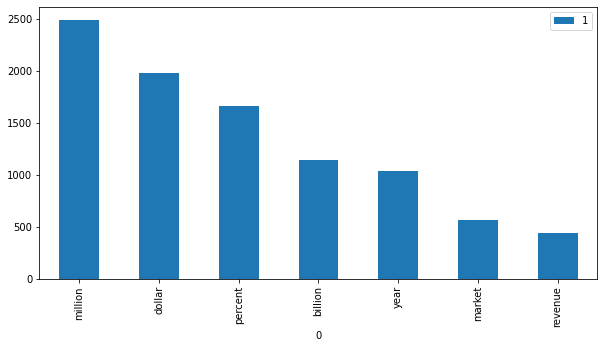

In [45]:
# визуализация наиболее часто встречающихся слов
value_count=400
df1[df1[1]>value_count].plot.bar(x=0,y=1,figsize=(10,5))

2340


<AxesSubplot:xlabel='0'>

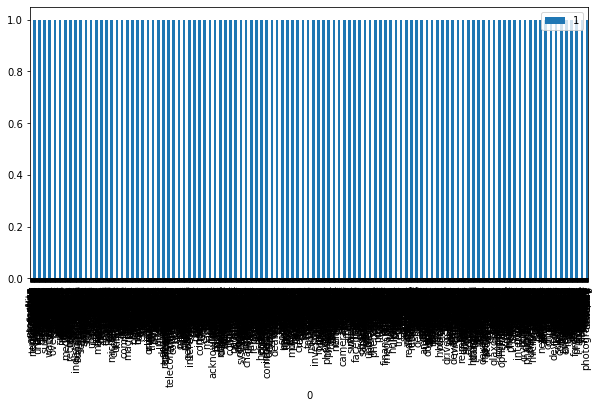

In [46]:
# визуализация наиболее редко встречающихся слов
print(df1[df1[1]<2].shape[0])
df1[df1[1]<2].plot.bar(x=0,y=1,figsize=(10,5))

In [47]:
# генерация мешка слов.
#max_features=1500, сколько термов берем в расчет
#min_df=5, если слово встречается меньшее число раз то игнорируем
#max_df=0.7 верхний порог. если терм встречается в большей доле документов то игнорируем
count_vect = CountVectorizer(max_features=1500, min_df=5, max_df=0.6)
bow = count_vect.fit_transform(df['Clean_sentence'].values)
bow.shape

(3549, 1448)

In [48]:
bow

<3549x1448 sparse matrix of type '<class 'numpy.int64'>'
	with 35447 stored elements in Compressed Sparse Row format>

In [49]:
#print(bow)

In [50]:
# посмотреть какие слова попали в мешок слов
terms = count_vect.get_feature_names()

c:\users\ysiberia\documents\github\market-growth-claims\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
#first 10 columns generated by BOW
terms[1440:]

['years', 'yet', 'york', 'young', 'youtube', 'yuan', 'zuckerberg', 'zynga']

In [52]:
bow

<3549x1448 sparse matrix of type '<class 'numpy.int64'>'
	with 35447 stored elements in Compressed Sparse Row format>

## BERT

In [53]:

from sentence_transformers import SentenceTransformer

In [54]:
# я выбрал семантическое ядро all-MiniLM-L6-v2. По сути на ХаггингФэйс у всех 
#семантических ядер близкие параметры. Это работает быстрее
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [55]:
X = df["Clean_sentence_lemm_spacy"].values.tolist()
corpus_embeddings = embedder.encode(X, show_progress_bar=True, batch_size=1)

Batches:   0%|          | 0/3549 [00:00<?, ?it/s]

In [56]:
corpus_embeddings

array([[ 0.02673015,  0.03791132, -0.04221233, ...,  0.00632371,
        -0.01707056,  0.04835823],
       [ 0.09723594, -0.08161187, -0.09692881, ...,  0.00287296,
        -0.0760578 ,  0.04674066],
       [ 0.0325125 ,  0.04952167,  0.00234975, ...,  0.03621686,
        -0.04530273,  0.03000223],
       ...,
       [ 0.03328777,  0.02232384, -0.02079982, ..., -0.13694465,
         0.06519207,  0.03290209],
       [-0.1169055 ,  0.00765158,  0.041093  , ...,  0.00294217,
        -0.04746404, -0.01752545],
       [-0.00135242, -0.00275573, -0.0669805 , ..., -0.06894088,
         0.01221057,  0.00857518]], dtype=float32)

## Word2Vec  
Векторизация текстов на основе w2v от gensim.

In [57]:
X = df["Clean_sentence_lemm_spacy"].values.tolist()

In [58]:
# 
w2v_model=gensim.models.Word2Vec(X,vector_size=200, 
                                 workers=4,
                                 window=5,# окно контекста
                                   min_count=2)

In [59]:
import numpy as np
sent_vectors = []; # the
for sent in X: # 
    sent_vec = np.zeros(200) # 
    cnt_words =0; # 
    for word in sent: # 
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

C:\Users\Ysiberia\AppData\Local\Temp\ipykernel_4852\2526275276.py:13: RuntimeWarning: invalid value encountered in true_divide
  sent_vec /= cnt_words


(3549, 200)

In [60]:
sent_vectors[1]

array([-0.04745758,  0.04217482,  0.02137729, -0.02218432,  0.02870123,
        0.03566933, -0.01778534,  0.02161481, -0.03584221,  0.00321267,
       -0.01507826, -0.06476222,  0.07039139, -0.01523068,  0.02719109,
        0.01010772, -0.009306  ,  0.04714153, -0.02308775, -0.11618277,
       -0.03167766,  0.01419448, -0.01625435,  0.03179675, -0.03588788,
        0.00825111,  0.0154015 , -0.04846255, -0.04207245, -0.01774667,
        0.02558217, -0.02242928,  0.05074667, -0.02369925, -0.02644802,
        0.00536177,  0.05981694,  0.02452732, -0.01102319, -0.03194012,
       -0.03353944, -0.01753263, -0.08930148,  0.0594828 ,  0.07595543,
       -0.1090344 ,  0.02736957, -0.08930087,  0.0359177 ,  0.03090947,
        0.03731638, -0.04830016, -0.02570558, -0.06037429,  0.02709665,
       -0.02027843, -0.01546105, -0.0431439 , -0.00875925, -0.03241092,
       -0.04560261, -0.07079502,  0.14169774,  0.03945368, -0.19487305,
        0.15074468, -0.08337012,  0.03072074, -0.12417591,  0.14

# Clustering

Кластеризация. Проводится 3 методами (KMeans, DBSCAN, AgglomerativeClustering), для каждого представления эмбедингов(word2vec,tfidf,bert,bag_of_words).  
ТАм где возможно проводится анализ параметров. НО не полным перебором

In [61]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [62]:
import gc

In [63]:
#Далее кластеризация представлена будет примерно по одной схеме:
#Кластеризуем и добавляем лейблы новым столбцом в датасет.  
#Имя столбца - *метод построение эмбедингов*_*алгоритм кластеризации*_*параметры алгоритма*


100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.80it/s]


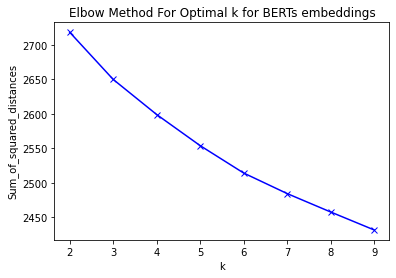

In [64]:
#Для наглядности строится зависимость суммы квадратов расстояний м\у элементом и 
#центром его кластера от количества кластеров.
#Расстояния зависят и от метода построения эмбедингов(разные масштабы)
Sum_of_squared_distances = []
K = range(2,10)
for k in tqdm.tqdm(K):
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(corpus_embeddings)
    Sum_of_squared_distances.append(km.inertia_)
    column_name=f'Bert_embed_K_means_{k}_clusters'
    labels = km.labels_
    df[column_name]=labels.tolist()
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k for BERTs embeddings')
plt.show()

In [65]:
df.to_excel(out_path)

In [66]:
gc.collect()

49873

100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.48it/s]


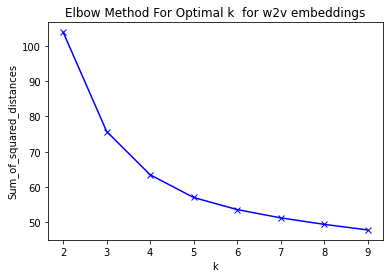

In [67]:
Sum_of_squared_distances = []
K = range(2,10)
for k in tqdm.tqdm(K):
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(sent_vectors)
    Sum_of_squared_distances.append(km.inertia_)
    column_name=f'w2v_embed_K_means_{k}_clusters'
    labels = km.labels_
    df[column_name]=labels.tolist()
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k  for w2v embeddings')
plt.show()

In [68]:
df.to_excel(out_path)

In [69]:
gc.collect()

78281

100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [00:36<00:00,  4.57s/it]


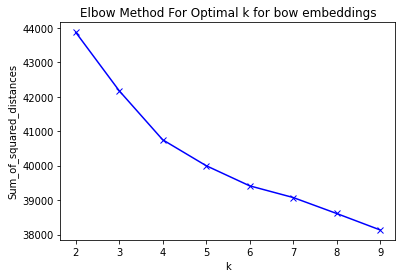

In [70]:
Sum_of_squared_distances = []
K = range(2,10)
for k in tqdm.tqdm(K):
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(bow)
    Sum_of_squared_distances.append(km.inertia_)
    column_name=f'bow_embed_K_means_{k}_clusters'
    labels = km.labels_
    df[column_name]=labels.tolist()
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k for bow embeddings')
plt.show()


In [92]:
df.to_excel(out_path)

In [93]:
gc.collect()

99587

100%|███████████████████████████████████████████████████████████████████████████████| 8/8 [01:24<00:00, 10.55s/it]


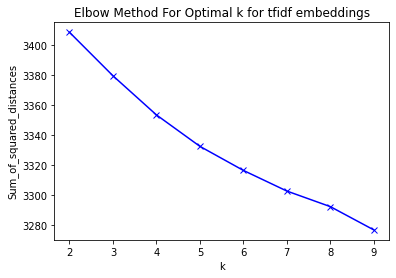

In [71]:
Sum_of_squared_distances = []
K = range(2,10)
for k in tqdm.tqdm(K):
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X_train_tfidf)
    Sum_of_squared_distances.append(km.inertia_)
    column_name=f'tfidf_embed_K_means_{k}_clusters'
    labels = km.labels_
    df[column_name]=labels.tolist()
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k for tfidf embeddings')
plt.show()

In [72]:
df.to_excel(out_path)

In [73]:
gc.collect()

135097

In [74]:
n_clusters=5

In [75]:
# небольшой пример получения популярных слов в кластерих. монограмы
km = KMeans(n_clusters=n_clusters, max_iter=200, n_init=10)
km = km.fit(corpus_embeddings) #word to vec
Sum_of_squared_distances.append(km.inertia_)

In [76]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(n_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: accord
 advise
 affiliates
 apparel
 account
 april
 accelerate
 animate
 alarm
 annenberg
Cluster 1: approve
 acrimony
 accord
 apple
 acquisition
 angular
 arm
 alike
 annenberg
 airplane
Cluster 2: atom
 analytics
 assistive
 atatürk
 airplane
 accord
 asus
 alarm
 army
 allow
Cluster 3: acrimony
 americans
 accord
 alibaba
 annually
 aim
 advise
 affordability
 aids
 asus
Cluster 4: accord
 annually
 american
 analytics
 atom
 annenberg
 acrimony
 arm
 alarm
 apple


## DBScan

In [77]:
#Считаю расстояние между minPts близжайшими соседями.
#
minPts = 100 # количество ближайших соседей до которых считаем расстояние
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == minPts and dists[minPts-1] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < minPts and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[minPts-1] 

In [78]:
rows=round(sent_vectors.shape[0]*0.2,0)
rows

In [79]:
#для каждого объекта считается расстояние от него до 200 близжйших
#потенциально не обязательно 200.
#делается для оптимального выбора параметра eps в DBSCAN. 
#Значение надо брать в меньше чем y где график начинает резко расти
#
twohundrethneigh = []
for val in sent_vectors[:rows]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:rows]) ) # rows можно заменитиь на число поменьше
twohundrethneigh.sort()

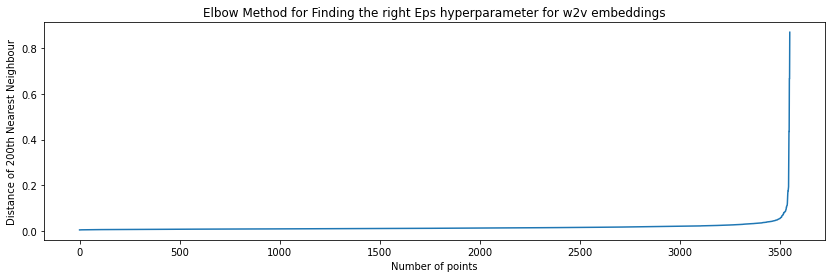

In [80]:
# зависимость расстояния до 200 близжйших соседей от количества учитываемых точек
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter for w2v embeddings")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [81]:
gc.collect()

3017

In [92]:
# кластеризация и сразу добавление лейблов датафрейм
# vr_ar_classification (eps = 0.1, min_samples = 100, metric='cosine', n_jobs=-1)
# vr_ar_classification (eps = 0.4, min_samples = 100, metric='cosine', n_jobs=-1)
#besprovodnaya_svyaz__0_95_classification DBSCAN(eps = 0.25, min_samples = 100, metric='cosine', n_jobs=-1)
#neur_ai_classification DBSCAN(eps = 0.05, min_samples = 100, metric='cosine', n_jobs=-1)
model = DBSCAN(eps = 0.4, min_samples = minPts, metric='cosine', n_jobs=-1)
model.fit(sent_vectors)
labels = model.labels_
print(set(labels))


{0, -1}


In [93]:
column_name=f'w2v_embed_DBSCAN_0.4_eps'
df[column_name]=labels.tolist()

In [94]:
gc.collect()

120

In [96]:
# vr_ar_classification (eps = 0.05, min_samples = 100, metric='cosine', n_jobs=-1)
#besprovodnaya_svyaz__0_95_classification DBSCAN(eps = 0.05, min_samples = 100, metric='cosine', n_jobs=-1)
#neur_ai_classification DBSCAN(eps = 0.2, min_samples = 100, metric='cosine', n_jobs=-1)
model = DBSCAN(eps = 0.05, min_samples = 100, metric='cosine', n_jobs=-1)
model.fit(sent_vectors)
labels = model.labels_
print(set(labels)) # список классов


{0, -1}


In [97]:
column_name=f'w2v_embed_DBSCAN_0.05_eps'
df[column_name]=labels.tolist()

In [98]:
df.to_excel(out_path)

In [99]:
bow_ar= bow.toarray() # из разреженной матрицы в обычный массив для работы алгоритма

In [100]:
twohundrethneigh = []
for val in bow_ar[:rows]:
    twohundrethneigh.append( compute200thnearestneighbour(val, bow_ar[:rows]) )
twohundrethneigh.sort()

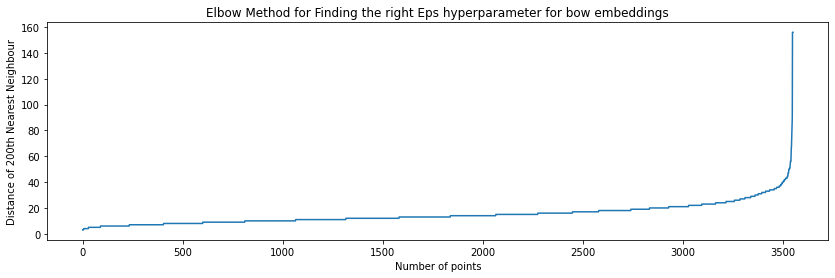

In [101]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter for bow embeddings")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [102]:
gc.collect()

149075

In [104]:
# vr_ar_classification (eps = 0.5, min_samples = 100, metric='cosine', n_jobs=-1)
#besprovodnaya_svyaz__0_95_classification DBSCAN(eps = 0.9, min_samples = 100, metric='cosine', n_jobs=-1)
#neur_ai_classification DBSCAN(eps = 0.5, min_samples = 100, metric='cosine', n_jobs=-1)
model = DBSCAN(eps = 0.5, min_samples = 100, metric='cosine', n_jobs=-1)
model.fit(bow_ar)
labels = model.labels_
print(set(labels))


{0, -1}


In [105]:
column_name=f'bow_embed_DBSCAN_0.5_eps'
df[column_name]=labels.tolist()

In [109]:
# vr_ar_classification (eps = 0.4, min_samples = 100, metric='cosine', n_jobs=-1)
#besprovodnaya_svyaz__0_95_classification DBSCAN(eps = 0.5, min_samples = 100, metric='cosine', n_jobs=-1)
#neur_ai_classification DBSCAN(eps = 0.4, min_samples = 100, metric='cosine', n_jobs=-1)
model = DBSCAN(eps = 0.4, min_samples = 100, metric='cosine', n_jobs=-1)
model.fit(bow_ar)
labels = model.labels_
print(set(labels))


{0, 1, -1}


In [110]:
column_name=f'bow_embed_DBSCAN_0.4_eps'
df[column_name]=labels.tolist()

In [111]:
gc.collect()

24

In [112]:
# vr_ar_classification (eps = 0.05, min_samples = 100, metric='cosine', n_jobs=-1)
#besprovodnaya_svyaz__0_95_classification DBSCAN(eps = 0.35, min_samples = 100, metric='cosine', n_jobs=-1)
#neur_ai_classification DBSCAN(eps = 0.35, min_samples = 100, metric='cosine', n_jobs=-1)
model = DBSCAN(eps = 0.35, min_samples = minPts, metric='cosine', n_jobs=-1)
model.fit(bow_ar)
labels = model.labels_
print(set(labels))


{0, 1, -1}


In [113]:
column_name=f'bow_embed_DBSCAN_0.35_eps'
df[column_name]=labels.tolist()

In [114]:
gc.collect()

24

In [115]:
df.to_excel(out_path)

In [116]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in corpus_embeddings[:rows]:
    twohundrethneigh.append( compute200thnearestneighbour(val, corpus_embeddings[:rows]) )
twohundrethneigh.sort()

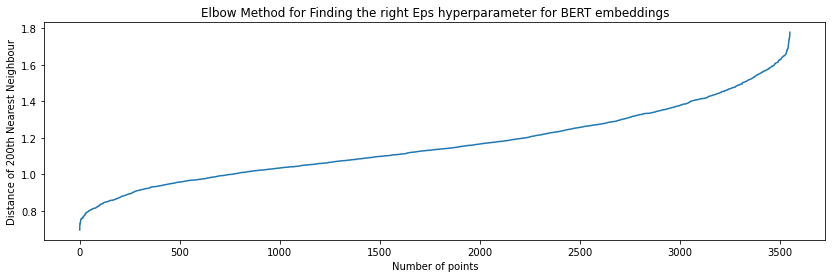

In [117]:
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter for BERT embeddings")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [128]:
# vr_ar_classification (eps = 0.6, min_samples = 100, metric='cosine', n_jobs=-1)
#besprovodnaya_svyaz__0_95_classification DBSCAN(eps = 0.35, min_samples = 100, metric='cosine', n_jobs=-1)
#neur_ai_classification DBSCAN(eps = 0.35, min_samples = 100, metric='cosine', n_jobs=-1)
model = DBSCAN(eps = 0.6, min_samples = minPts, metric='cosine', n_jobs=-1)
model.fit(corpus_embeddings)
labels = model.labels_
print(set(labels))


{0, -1}


In [129]:
column_name=f'BERT_embed_DBSCAN_0.6_eps'
df[column_name]=labels.tolist()

In [130]:
df.to_excel(out_path)

In [131]:
gc.collect()

159954

In [134]:
# vr_ar_classification (eps = 0.4, min_samples = 100, metric='cosine', n_jobs=-1)
#besprovodnaya_svyaz__0_95_classification DBSCAN(eps = 0.35, min_samples = 100, metric='cosine', n_jobs=-1)
#neur_ai_classification DBSCAN(eps = 0.36, min_samples = 100, metric='cosine', n_jobs=-1)
model = DBSCAN(eps = 0.4, min_samples = minPts, metric='cosine', n_jobs=-1)
model.fit(corpus_embeddings)
labels = model.labels_
print(set(labels))


{0, 1, -1}


In [135]:
column_name=f'BERT_embed_DBSCAN_0.4_eps'
df[column_name]=labels.tolist()

In [136]:
df.to_excel(out_path)

In [137]:
gc.collect()

163505

In [138]:
X_train_tfidf_arr=X_train_tfidf.toarray()
X_train_tfidf_arr.shape

(3549, 5206)

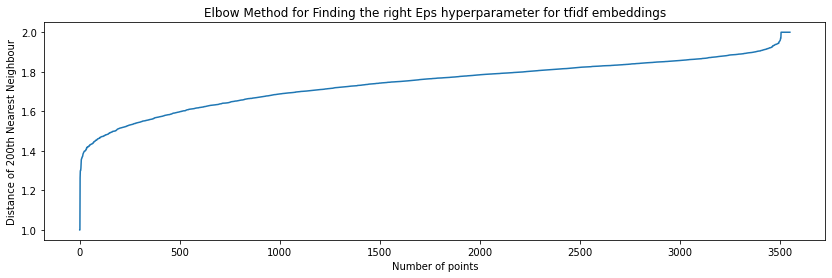

In [139]:

twohundrethneigh = []
for val in X_train_tfidf_arr[:rows]:
    twohundrethneigh.append( compute200thnearestneighbour(val, X_train_tfidf_arr[:rows]) )
twohundrethneigh.sort()
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter for tfidf embeddings")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [149]:
# vr_ar_classification (eps = 0.8, min_samples = 100, metric='cosine', n_jobs=-1)
#besprovodnaya_svyaz__0_95_classification DBSCAN(eps = 0.7, min_samples = 100, metric='cosine', n_jobs=-1)
#neur_ai_classification DBSCAN(eps = 0.6, min_samples = 100, metric='cosine', n_jobs=-1)
model = DBSCAN(eps = 0.8, min_samples = minPts, metric='cosine', n_jobs=-1)
model.fit(X_train_tfidf_arr)
labels = model.labels_
print(set(labels))


{0, -1}


In [150]:
column_name=f'tfidf_embed_DBSCAN_0.8_eps'
df[column_name]=labels.tolist()

In [151]:
gc.collect()

3214

In [160]:
# vr_ar_classification (eps = 0.7, min_samples = 100, metric='cosine', n_jobs=-1)
#besprovodnaya_svyaz__0_95_classification DBSCAN(eps = 0.6, min_samples = 100, metric='cosine', n_jobs=-1)
#neur_ai_classification DBSCAN(eps = 0.5, min_samples = 100, metric='cosine', n_jobs=-1)
model = DBSCAN(eps = 0.70, min_samples = minPts, metric='cosine', n_jobs=-1)
model.fit(X_train_tfidf_arr)
labels = model.labels_
print(set(labels))


{0, 1, -1}


In [161]:
column_name=f'tfidf_embed_DBSCAN_0.7_eps'
df[column_name]=labels.tolist()

In [162]:
gc.collect()

96

In [163]:
df.to_excel(out_path)

## Clustering Hierarchical
работает очень долго!

In [164]:
K = range(2,5)
for k in tqdm.tqdm(K):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
    Agg=cluster.fit_predict(sent_vectors)
    column_name=f'w2v_embed_Agg_{k}_clusters'
    labels = km.labels_
    df[column_name]=labels.tolist()


100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.08s/it]


In [165]:
df.to_excel(out_path)

In [166]:
K = range(2,5)
for k in tqdm.tqdm(K):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
    Agg=cluster.fit_predict(bow_ar)
    column_name=f'bow_embed_Agg_{k}_clusters'
    labels = km.labels_
    df[column_name]=labels.tolist()

100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:23<00:00,  7.67s/it]


In [167]:
df.to_excel(out_path)

In [168]:
K = range(2,5)
for k in tqdm.tqdm(K):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
    Agg=cluster.fit_predict(corpus_embeddings)
    column_name=f'bert_embed_Agg_{k}_clusters'
    labels = km.labels_
    df[column_name]=labels.tolist()

100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.65s/it]


In [169]:
df.to_excel(out_path)

In [ ]:
# если обратил внимание то на X_train_tfidf_arr вообще все долго работает. А конкретно вот эта ячейка ОЧЕНЬ долго. я предупредил
K = range(2,5)
for k in tqdm.tqdm(K):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
    Agg=cluster.fit_predict(X_train_tfidf_arr)
    column_name=f'tfidf_embed_Agg_{k}_clusters'
    labels = km.labels_
    df[column_name]=labels.tolist()

  0%|                                                                                       | 0/3 [00:00<?, ?it/s]

In [ ]:
df.to_excel(out_path)

## Searching best result

In [11]:
df=pd.read_excel('data/besprovodnaya_svyaz__0_95_classification_output.xlsx')

In [12]:
#оставляем только нужные колонки 'Clean_sentence_lemm_nltk',
df=df.drop(columns=['Bert_embed_K_means_2_clusters',
       'Bert_embed_K_means_4_clusters',
       'Bert_embed_K_means_5_clusters', 'Bert_embed_K_means_6_clusters',
       'Bert_embed_K_means_7_clusters', 'Bert_embed_K_means_8_clusters',
       'Bert_embed_K_means_9_clusters', 'w2v_embed_K_means_2_clusters',
       'w2v_embed_K_means_3_clusters', 'w2v_embed_K_means_4_clusters',
       'w2v_embed_K_means_5_clusters', 'w2v_embed_K_means_6_clusters',
       'w2v_embed_K_means_7_clusters', 'w2v_embed_K_means_8_clusters',
       'w2v_embed_K_means_9_clusters', 'bow_embed_K_means_2_clusters',
       'bow_embed_K_means_3_clusters', 'bow_embed_K_means_4_clusters',
       'bow_embed_K_means_5_clusters', 'bow_embed_K_means_6_clusters',
       'bow_embed_K_means_7_clusters', 'bow_embed_K_means_8_clusters',
       'bow_embed_K_means_9_clusters', 'tfidf_embed_K_means_2_clusters',
       'tfidf_embed_K_means_3_clusters', 'tfidf_embed_K_means_4_clusters',
       'tfidf_embed_K_means_5_clusters', 'tfidf_embed_K_means_6_clusters',
       'tfidf_embed_K_means_7_clusters', 'tfidf_embed_K_means_8_clusters',
       'tfidf_embed_K_means_9_clusters', 'w2v_embed_DBSCAN_0.25_eps',
       'w2v_embed_DBSCAN_0.05_eps', 'bow_embed_DBSCAN_0.9_eps',
       'bow_embed_DBSCAN_0.5_eps', 'bow_embed_DBSCAN_0.35_eps',
       'BERT_embed_DBSCAN_0.25_eps',
       'tfidf_embed_DBSCAN_0.7_eps', 'tfidf_embed_DBSCAN_0.6_eps',
       'w2v_embed_Agg_2_clusters', 'w2v_embed_Agg_3_clusters',
       'w2v_embed_Agg_4_clusters', 'bow_embed_Agg_2_clusters',
       'bow_embed_Agg_3_clusters', 'bow_embed_Agg_4_clusters',
       'bert_embed_Agg_2_clusters', 'bert_embed_Agg_3_clusters',
       'bert_embed_Agg_4_clusters'],axis=1)        
df=df.dropna(axis='index')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28935 entries, 0 to 28941
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     28935 non-null  int64 
 1   sentence                       28935 non-null  object
 2   Clean_sentence                 28935 non-null  object
 3   Clean_sentence_lemm_nltk       28935 non-null  object
 4   Clean_sentence_lemm_spacy      28935 non-null  object
 5   Bert_embed_K_means_3_clusters  28935 non-null  int64 
 6   BERT_embed_DBSCAN_0.2_eps      28935 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.8+ MB


In [13]:
#Bert_embed_K_means_3_clusters 1 - целевой, 0,2 - мусорные
df[df.Bert_embed_K_means_3_clusters==0]

,Unnamed: 0,sentence,Clean_sentence,Clean_sentence_lemm_nltk,Clean_sentence_lemm_spacy,Bert_embed_K_means_3_clusters,BERT_embed_DBSCAN_0.2_eps
2,2,"Just looking at autonomous vehicles, for example, a latency of 1 millisecond means that data can be shared between cars travelling at 70 miles per hour in 31 millimeters.",looking autonomous vehicles example latency millisecond means data shared cars travelling miles hour millimeters,looking autonomous vehicle example latency millisecond mean data shared car travelling mile hour millimeter,look autonomous vehicle example latency millisecond mean datum share car travel mile hour millimeter,0,-1
11,11,"The fund invests 11.8% of its portfolio in Intel, 5.8% in Nvidia, and 4.8% in AMD.",fund invests percent portfolio intel percent nvidia percent amd,fund invests percent portfolio intel percent nvidia percent amd,fund invest percent portfolio intel percent nvidia percent amd,0,-1
17,17,"AT&T stock has an average target price of $39.02, with a potential downside of around 0.6% over the next 12 months.",stock average target price dollar potential downside around percent next months,stock average target price dollar potential downside around percent next month,stock average target price dollar potential downside around percent next month,0,-1
21,21,"In the third quarter of 2019, its discrete GPU market share rose to 72.9% from 67.9% in the previous quarter, according to JPR.",third quarter discrete gpu market share rose percent percent previous quarter according,third quarter discrete gpu market share rose percent percent previous quarter according,third quarter discrete gpu market share rise percent percent previous quarter accord,0,-1
22,22,"It peaked at 36.1% in the second quarter of 2018, according to this JPR report.",peaked percent second quarter according report,peaked percent second quarter according report,peak percent second quarter accord report,0,-1
24,24,"The augmented reality, virtual reality, and gaming marketplace will be up about 30% in exhibitors and 15% in square footage.",augmented reality virtual reality gaming marketplace percent exhibitors percent square footage,augmented reality virtual reality gaming marketplace percent exhibitor percent square footage,augment reality virtual reality gaming marketplace percent exhibitor percent square footage,0,-1
31,31,"According to Gartner’s preliminary results, worldwide PC shipments fell 8.3% year-over-year in the calendar fourth quarter of 2015.",according gartner preliminary results worldwide shipments fell percent year year calendar fourth quarter,according gartner preliminary result worldwide shipment fell percent year year calendar fourth quarter,accord gartner preliminary result worldwide shipment fall percent year year calendar fourth quarter,0,-1
32,32,"The latest data suggests gamers account for 18.6% of mobile users, which is expected to rise to 22.5% by 2024.",latest data suggests gamers account percent mobile users expected rise percent,latest data suggests gamers account percent mobile user expected rise percent,late datum suggest gamer account percent mobile user expect rise percent,0,-1
36,36,This drove the data consumption from average 800MB in 2015 to 8GB per month per user in 2019.,drove data consumption average month user,drove data consumption average month user,drive data consumption average month user,0,-1
37,37,"Key Insights:1) A 5G-enabled phone uses about 1,000 capacitors, or about 30 per cent more than a 4G predecessor.",key insights enabled phone uses capacitors cent predecessor,key insight enabled phone us capacitor cent predecessor,key insight enable phone use capacitor cent predecessor,0,-1


## Search n-grams

In [14]:
import statistics


In [15]:
def search_ngrams(data:list, n_size:int):
    '''
    ищет нграммы заданой длины
    data - список с строками в которых ищем нграммы
    n_size - размер н граммы
    '''
    n_grams_counter={}
    for sentence in data:
        sentence=sentence.split(' ')
        for word in range(len(sentence)-n_size+1):
            n_gramma=sentence[word:word+n_size]
            n_gramma=' '.join([w for w in n_gramma])
            if n_gramma in n_grams_counter.keys():
                n_grams_counter[n_gramma]+=1
            else:
                n_grams_counter[n_gramma]=1
    return n_grams_counter

In [17]:
# получаем целевые данные и остальные
X_Kmean_aim = df.Clean_sentence_lemm_spacy[df.Bert_embed_K_means_3_clusters==1].values.tolist()
X_Kmean_other = df.Clean_sentence_lemm_spacy[df.Bert_embed_K_means_3_clusters!=1].values.tolist()

In [18]:
def n_gram_analitic(aim_dictionary:dict,other_dictionary:list,min_count=1):
    '''
    вычисляет н-граммы которые встречаются только в целевых текстах
    вычисляем числовые характеристики нграмм
    вычисляем нграммы характерные только для нецелевых текстов
    везде учитывается минимальная частота встречаемости нграммы чтобы не учитывать "мусорные"
    которые встречаются по 1 разу
    '''
    # сначала считаем н-граммы, уникальные для целевых текстов
    unic_aim_ngrams=set(aim_dictionary.keys()).difference(set(other_dictionary.keys()))
    unic_aim_ngrams={key:value for (key,value) in aim_dictionary.items() if key in unic_aim_ngrams and value >min_count}
    unic_aim_ngrams = sorted(unic_aim_ngrams.items(), key=lambda item: item[1],reverse=True)
    unic_aim_ngrams=dict(unic_aim_ngrams)
    print(f'найдено {len(unic_aim_ngrams)} уникальных н-грамм в целевых текстах')
    all_values = unic_aim_ngrams.values()
    max_value = max(all_values)
    min_value = min(all_values)
    mean_value = sum(all_values)/len(all_values)
    mode_value = statistics.mode(all_values)
    st_dev = statistics.pstdev(all_values)
    print(f'максимальная частота упоминания н-граммы в целевых текстах {max_value}')
    print(f'минимальная частота упоминания н-граммы в целевых текстах {min_value}')
    print(f'средняя частота упоминания н-граммы в целевых текстах {mean_value}')
    print(f'модальная частота упоминания н-граммы в целевых текстах {mode_value}')
    print(f'стандартное отклонение частоты упоминания н-граммы в целевых текстах {st_dev}')
    plt.plot(sorted(all_values,reverse=True))
    plt.ylabel("количество упоминаний н-граммы в целевых текстах")
    print('\n\n')
    # считаем н-граммы которых не должно быть в целевых текстах
    unic_other_ngram=set(other_dictionary.keys()).difference(set(aim_dictionary.keys()))
    unic_other_ngram={key:value for (key,value) in other_dictionary.items() if key in unic_other_ngram and value >min_count}
    unic_other_ngram = sorted(unic_other_ngram.items(), key=lambda item: item[1],reverse=True)
    unic_other_ngram=dict(unic_other_ngram)
    print(f'найдено {len(unic_other_ngram)} уникальных н-грамм в нецелевых текстах')
    all_values = unic_other_ngram.values()
    max_value = max(all_values)
    min_value = min(all_values)
    mean_value = sum(all_values)/len(all_values)
    mode_value = statistics.mode(all_values)
    st_dev = statistics.pstdev(all_values)
    print(f'максимальная частота упоминания н-граммы в нецелевых текстах {max_value}')
    print(f'минимальная частота упоминания н-граммы в нецелевых текстах {min_value}')
    print(f'средняя частота упоминания н-граммы в нецелевых текстах {mean_value}')
    print(f'модальная частота упоминания н-граммы в нецелевых текстах {mode_value}')
    print(f'стандартное отклонение частоты упоминания н-граммы в нецелевых текстах {st_dev}')
    
    return unic_aim_ngrams,unic_other_ngram

In [19]:
# задаем минимальную частоту встречаемости нграммы
min_count=2

найдено 1915 уникальных н-грамм в целевых текстах
максимальная частота упоминания н-граммы в целевых текстах 131
минимальная частота упоминания н-граммы в целевых текстах 3
средняя частота упоминания н-граммы в целевых текстах 4.8877284595300265
модальная частота упоминания н-граммы в целевых текстах 3
стандартное отклонение частоты упоминания н-граммы в целевых текстах 4.826864640245



найдено 9483 уникальных н-грамм в нецелевых текстах
максимальная частота упоминания н-граммы в нецелевых текстах 151
минимальная частота упоминания н-граммы в нецелевых текстах 3
средняя частота упоминания н-граммы в нецелевых текстах 5.400189813350206
модальная частота упоминания н-граммы в нецелевых текстах 3
стандартное отклонение частоты упоминания н-граммы в нецелевых текстах 5.952448568319376


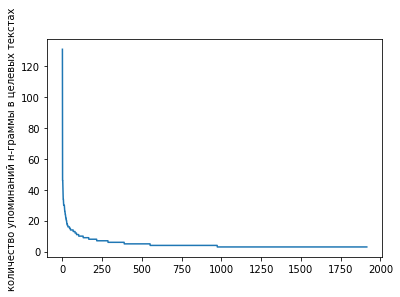

In [20]:
bigrams_X_Kmean_aim=search_ngrams(X_Kmean_aim,2)
bigrams_X_Kmean_other=search_ngrams(X_Kmean_other,2)
aim_bigrams,other_bigrams=n_gram_analitic(bigrams_X_Kmean_aim,bigrams_X_Kmean_other,min_count)

In [21]:
aim_bigrams

{'quarter dollar': 131,
 'gross profit': 46,
 'dollar dilute': 46,
 'revenue second': 42,
 'billion quarter': 39,
 'quarter sale': 34,
 'billion profit': 34,
 'profit increase': 32,
 'sale revenue': 30,
 'ebitda dollar': 30,
 'ebitda grow': 30,
 'segment revenue': 30,
 'compare operate': 30,
 'record dollar': 28,
 'company record': 27,
 'repurchase million': 26,
 'gaap basis': 26,
 'gaap income': 25,
 'cash equivalent': 24,
 'gaap earning': 24,
 'compare revenue': 23,
 'fiscal compare': 22,
 'cash cash': 22,
 'compare profit': 21,
 'million income': 21,
 'fiscal revenue': 20,
 'ebitda decline': 20,
 'income rise': 19,
 'year operating': 18,
 'quarter decrease': 18,
 'grow revenue': 18,
 'revenue stand': 17,
 'expense dollar': 17,
 'expense percent': 17,
 'growth revenue': 17,
 'iphone revenue': 16,
 'earning interest': 16,
 'sequentially percent': 16,
 'fiscal second': 16,
 'currency term': 16,
 'revenue fourth': 16,
 'company repurchase': 16,
 'compare income': 16,
 'adjust operating'

найдено 3106 уникальных н-грамм в целевых текстах
максимальная частота упоминания н-граммы в целевых текстах 127
минимальная частота упоминания н-граммы в целевых текстах 3
средняя частота упоминания н-граммы в целевых текстах 4.907598197037991
модальная частота упоминания н-граммы в целевых текстах 3
стандартное отклонение частоты упоминания н-граммы в целевых текстах 5.7939640607447815



найдено 9531 уникальных н-грамм в нецелевых текстах
максимальная частота упоминания н-граммы в нецелевых текстах 220
минимальная частота упоминания н-граммы в нецелевых текстах 3
средняя частота упоминания н-граммы в нецелевых текстах 4.2719546742209635
модальная частота упоминания н-граммы в нецелевых текстах 3
стандартное отклонение частоты упоминания н-граммы в нецелевых текстах 3.6287866988458006


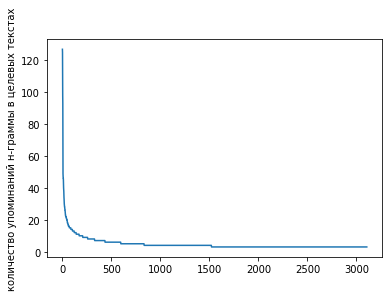

In [22]:
tergrams_X_Kmean_aim=search_ngrams(X_Kmean_aim,3)
tergrams_X_Kmean_other=search_ngrams(X_Kmean_other,3)
aim_tergrams,other_tergrams=n_gram_analitic(tergrams_X_Kmean_aim,tergrams_X_Kmean_other,min_count)

найдено 3298 уникальных н-грамм в целевых текстах
максимальная частота упоминания н-граммы в целевых текстах 121
минимальная частота упоминания н-граммы в целевых текстах 3
средняя частота упоминания н-граммы в целевых текстах 4.749545178896301
модальная частота упоминания н-граммы в целевых текстах 3
стандартное отклонение частоты упоминания н-граммы в целевых текстах 5.467726700300944



найдено 7507 уникальных н-грамм в нецелевых текстах
максимальная частота упоминания н-граммы в нецелевых текстах 38
минимальная частота упоминания н-граммы в нецелевых текстах 3
средняя частота упоминания н-граммы в нецелевых текстах 3.741441321433329
модальная частота упоминания н-граммы в нецелевых текстах 3
стандартное отклонение частоты упоминания н-граммы в нецелевых текстах 1.5346075486413961


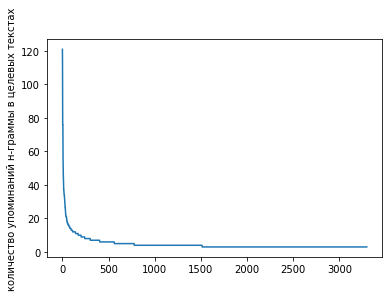

In [23]:
fourgrams_X_Kmean_aim=search_ngrams(X_Kmean_aim,4)
fourgrams_X_Kmean_other=search_ngrams(X_Kmean_other,4)
aim_fourgrams,other_fourgrams=n_gram_analitic(fourgrams_X_Kmean_aim,fourgrams_X_Kmean_other,min_count)

найдено 2848 уникальных н-грамм в целевых текстах
максимальная частота упоминания н-граммы в целевых текстах 109
минимальная частота упоминания н-граммы в целевых текстах 3
средняя частота упоминания н-граммы в целевых текстах 4.384480337078652
модальная частота упоминания н-граммы в целевых текстах 3
стандартное отклонение частоты упоминания н-граммы в целевых текстах 4.077031875684038



найдено 6059 уникальных н-грамм в нецелевых текстах
максимальная частота упоминания н-граммы в нецелевых текстах 17
минимальная частота упоминания н-граммы в нецелевых текстах 3
средняя частота упоминания н-граммы в нецелевых текстах 3.5964680640369697
модальная частота упоминания н-граммы в нецелевых текстах 3
стандартное отклонение частоты упоминания н-граммы в нецелевых текстах 1.122646033830429


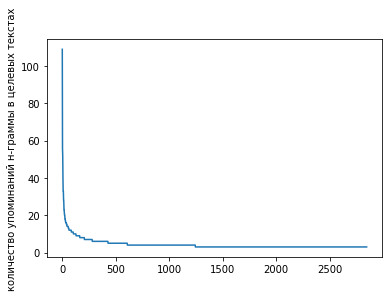

In [24]:
fivegrams_X_Kmean_aim=search_ngrams(X_Kmean_aim,5)
fivegrams_X_Kmean_other=search_ngrams(X_Kmean_other,5)
aim_fivegrams,other_fivegrams=n_gram_analitic(fivegrams_X_Kmean_aim,fivegrams_X_Kmean_other,min_count)

In [25]:
def find_dublicate_word(string):
    '''
    ищет дублирующиеся слова в строке
    '''
    string=string.split()
    for i in range(0,len(string)):
        count=1
        for j in range(i+1,len(string)):
            if(string[i] == (string[j])):
                return False
    return True
             



In [26]:
# по нашим целевым нграммам удаляем нграммы в которых повторяются слов
# например dollar dollar или percent dollar percent
# потому что они скорее всего получены на стыках предложений
a=len(aim_bigrams)
aim_bigrams={key:value for (key,value) in aim_bigrams.items() if find_dublicate_word(key)}
b=len(aim_bigrams)
print(f'удалено {a-b} биграммы')

удалено 3 биграммы


In [27]:
a=len(aim_tergrams)
aim_tergrams={key:value for (key,value) in aim_tergrams.items() if find_dublicate_word(key)}
b=len(aim_tergrams)
print(f'удалено {a-b} триграммы')

удалено 123 триграммы


In [28]:
aim_tergrams

{'million decrease percent': 127,
 'dollar million decrease': 125,
 'income dollar million': 107,
 'quarter dollar million': 98,
 'decrease percent million': 93,
 'million dollar share': 51,
 'dollar million third': 49,
 'dollar million fiscal': 47,
 'ebitda margin percent': 46,
 'dollar dilute share': 46,
 'second quarter dollar': 45,
 'profit dollar million': 40,
 'quarter compare dollar': 40,
 'revenue second quarter': 39,
 'operating income dollar': 38,
 'income increase percent': 34,
 'ebitda increase percent': 34,
 'dollar billion third': 33,
 'million dollar dilute': 30,
 'operate income dollar': 29,
 'dollar billion quarter': 28,
 'full year revenue': 28,
 'operate loss dollar': 28,
 'dollar share compare': 27,
 'billion fiscal year': 27,
 'repurchase million share': 26,
 'dollar million quarter': 26,
 'ebitda dollar million': 25,
 'third quarter revenue': 24,
 'million percent term': 24,
 'profit increase percent': 23,
 'third quarter dollar': 23,
 'second quarter fiscal': 22,

In [29]:

a=len(aim_fourgrams)
aim_fourgrams={key:value for (key,value) in aim_fourgrams.items() if find_dublicate_word(key)}
b=len(aim_fourgrams)
print(f'удалено {a-b} четыреграммы')

удалено 454 четыреграммы


In [30]:
aim_fourgrams

{'dollar million decrease percent': 121,
 'dollar million second quarter': 85,
 'dollar million increase percent': 76,
 'increase percent dollar million': 76,
 'dollar million percent sale': 61,
 'dollar million third quarter': 49,
 'revenue dollar million percent': 45,
 'dollar million percent year': 44,
 'million decrease percent compare': 41,
 'compare dollar million percent': 40,
 'dollar million first quarter': 37,
 'second quarter dollar million': 37,
 'dollar billion increase percent': 36,
 'million increase percent compare': 36,
 'operating income dollar million': 34,
 'dollar million percent total': 34,
 'quarter compare dollar million': 34,
 'million percent total revenue': 34,
 'dollar billion third quarter': 33,
 'million dollar dilute share': 30,
 'revenue rise percent year': 29,
 'revenue fall percent dollar': 27,
 'operate loss dollar million': 27,
 'income dollar million percent': 26,
 'dollar billion fiscal year': 24,
 'operate income dollar million': 24,
 'increase do

In [31]:

a=len(aim_fivegrams)
aim_fivegrams={key:value for (key,value) in aim_fivegrams.items() if find_dublicate_word(key)}
b=len(aim_fivegrams)
print(f'удалено {a-b} пятиграммы')

удалено 841 пятиграммы


In [32]:
aim_fivegrams

{'dollar million decrease percent compare': 41,
 'dollar million increase percent compare': 33,
 'dollar million percent total revenue': 33,
 'revenue dollar billion percent year': 28,
 'revenue fall percent dollar billion': 23,
 'compare dollar million second quarter': 21,
 'percent dollar billion year early': 20,
 'compare dollar million percent sale': 18,
 'revenue dollar million increase percent': 18,
 'dollar billion fiscal year end': 17,
 'increase percent compare dollar million': 17,
 'operating income dollar million percent': 16,
 'compare dollar million third quarter': 16,
 'profit increase percent dollar million': 16,
 'year dollar million percent sale': 16,
 'revenue dollar million percent year': 15,
 'quarter percent compare dollar million': 15,
 'million increase percent compare dollar': 15,
 'revenue dollar million percent total': 15,
 'compare dollar million percent total': 15,
 'income dollar million percent year': 14,
 'growth rate cagr percent shipment': 14,
 'dollar 

In [33]:
def ngram_container_counter(string,ngram_list):
    counter=0
    for ngram in ngram_list:
        if ngram in string:
            counter+=1
    return counter

In [34]:
# создаем столбцы и в них отмечаем сколько специфических нграмм содержит текст
# соответственно если хоть одна содержится - текст целевой
df['bigram_count']=df.Clean_sentence_lemm_nltk.apply(lambda x: ngram_container_counter(x,aim_bigrams.keys()))
df['tergram_count']=df.Clean_sentence_lemm_nltk.apply(lambda x: ngram_container_counter(x,aim_tergrams.keys()))
df['fourgram_count']=df.Clean_sentence_lemm_nltk.apply(lambda x: ngram_container_counter(x,aim_fourgrams.keys()))
df['fivegram_count']=df.Clean_sentence_lemm_nltk.apply(lambda x: ngram_container_counter(x,aim_fivegrams.keys()))

In [35]:
df

,Unnamed: 0,sentence,Clean_sentence,Clean_sentence_lemm_nltk,Clean_sentence_lemm_spacy,Bert_embed_K_means_3_clusters,BERT_embed_DBSCAN_0.2_eps,bigram_count,tergram_count,fourgram_count,fivegram_count
0,0,Chairman Eric Xu said Huawei’s sales revenue for 2019 was likely to reach 850 billion yuan (US$121 billion) — up roughly 18 percent from the previous year.,chairman eric said huawei sales revenue likely reach billion yuan dollar billion roughly percent previous year,chairman eric said huawei sale revenue likely reach billion yuan dollar billion roughly percent previous year,chairman eric say huawei sale revenue likely reach billion yuan dollar billion roughly percent previous year,1,-1,2,1,1,0
1,1,The AI and cognitive market in the UAE is set to grow between 25% and 30% year over year in the next two to three years.,cognitive market grow percent percent year year next three years,cognitive market grow percent percent year year next three year,cognitive market grow percent percent year year next three year,1,-1,0,0,0,0
2,2,"Just looking at autonomous vehicles, for example, a latency of 1 millisecond means that data can be shared between cars travelling at 70 miles per hour in 31 millimeters.",looking autonomous vehicles example latency millisecond means data shared cars travelling miles hour millimeters,looking autonomous vehicle example latency millisecond mean data shared car travelling mile hour millimeter,look autonomous vehicle example latency millisecond mean datum share car travel mile hour millimeter,0,-1,0,0,0,0
3,3,Chairman Eric Xu said Huawei's sales revenue for 2019 was likely to reach 850 billion yuan (US$121 billion) -- up roughly 18 percent from the previous year.,chairman eric said huawei sales revenue likely reach billion yuan dollar billion roughly percent previous year,chairman eric said huawei sale revenue likely reach billion yuan dollar billion roughly percent previous year,chairman eric say huawei sale revenue likely reach billion yuan dollar billion roughly percent previous year,1,-1,2,1,1,0
4,4,"And in fiscal 2020, it expects this number to grow 7.8% on a year-over-year basis.",fiscal expects number grow percent year year basis,fiscal expects number grow percent year year basis,fiscal expect number grow percent year year basis,1,-1,0,0,0,0
5,5,So Nvidia’s automotive revenue has doubled from $320 million in fiscal 2016 to $640 million in fiscal 2019.,nvidia automotive revenue doubled dollar million fiscal dollar million fiscal,nvidia automotive revenue doubled dollar million fiscal dollar million fiscal,nvidia automotive revenue double dollar million fiscal dollar million fiscal,1,-1,0,3,0,0
6,6,Game consoles were added in fiscal 2017.Nvidia’s Tegra revenue rose almost threefold from $559 million in fiscal 2016 to $1.54 billion in fiscal 2019.,game consoles added fiscal nvidia tegra revenue rose almost threefold dollar million fiscal dollar billion fiscal,game console added fiscal nvidia tegra revenue rose almost threefold dollar million fiscal dollar billion fiscal,game console add fiscal nvidia tegra revenue rise almost threefold dollar million fiscal dollar billion fiscal,1,-1,1,2,0,0
7,7,"Back in fiscal 2016, Nvidia earned 5% of its revenue—or $264 million—from licensing.",back fiscal nvidia earned percent revenue dollar million licensing,back fiscal nvidia earned percent revenue dollar million licensing,back fiscal nvidia earn percent revenue dollar million licensing,1,-1,0,0,0,0
8,8,"Moreover, it’s expected to outperform the market, even in 2019.The WSTS (World Semiconductor Trade Statistics) expects global semiconductor revenue to fall 12.8% in 2019.",moreover expected outperform market even wsts world semiconductor trade statistics expects global semiconductor revenue fall percent,moreover expected outperform market even wsts world semiconductor trade statistic expects global semiconductor revenue fall percent,moreover expect outperform market even wst world semiconductor trade statistic expect g

In [36]:
# сколько нецелевых текстов
len(df[(df.Bert_embed_K_means_3_clusters !=1)])

20287

In [37]:
# сколько целевых текстов
len(df[(df.Bert_embed_K_means_3_clusters ==1)])

8648

In [38]:
# сколько целевых текстов не содержит ни одной специфичной нграммы
len(df[(df.Bert_embed_K_means_3_clusters ==1)&(df.bigram_count==0) & (df.tergram_count==0)& (df.fourgram_count==0)& (df.fivegram_count==0)])
# таким образом  уникальными нграммами мы уже покрываем примерно 75% целевых текстов

2969

In [39]:
# сколько целевых нграмм содержит текст
df['uniq_aim_ngrams']=df['bigram_count']+df['tergram_count']+df['fourgram_count']+df['fivegram_count']

In [40]:
len(df[(df.Bert_embed_K_means_3_clusters ==1)&(df.uniq_aim_ngrams==0)])

2969

In [41]:
df=df.drop(columns=['bigram_count','tergram_count','fourgram_count','fivegram_count'],axis=1)

In [42]:
list(aim_bigrams.keys())

['quarter dollar',
 'gross profit',
 'dollar dilute',
 'revenue second',
 'billion quarter',
 'quarter sale',
 'billion profit',
 'profit increase',
 'sale revenue',
 'ebitda dollar',
 'ebitda grow',
 'segment revenue',
 'compare operate',
 'record dollar',
 'company record',
 'repurchase million',
 'gaap basis',
 'gaap income',
 'cash equivalent',
 'gaap earning',
 'compare revenue',
 'fiscal compare',
 'compare profit',
 'million income',
 'fiscal revenue',
 'ebitda decline',
 'income rise',
 'year operating',
 'quarter decrease',
 'grow revenue',
 'revenue stand',
 'expense dollar',
 'expense percent',
 'growth revenue',
 'iphone revenue',
 'earning interest',
 'sequentially percent',
 'fiscal second',
 'currency term',
 'revenue fourth',
 'company repurchase',
 'compare income',
 'adjust operating',
 'gaap loss',
 'decline dollar',
 'quarter income',
 'share quarter',
 'flow operating',
 'fiscal quarter',
 'software subscription',
 'fiscal third',
 'increase operate',
 'high revenu

In [43]:
all_aim_ngrams=list(aim_bigrams.keys())+list(aim_tergrams.keys())+list(aim_fourgrams.keys())+list(aim_fivegrams.keys())

In [44]:
with open(r'./data/besprovodnaya_svyaz__0_95_classification_aim_ngrams.txt', 'w') as fp:
    for item in all_aim_ngrams:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [45]:
# смотрим биграммы которые встречаются и там и там, но чаще в целевой группе

In [46]:
def make_pre_aim_ngrams(aim_dictionary,other_dictionary,aim_len,other_len):
    '''
    собирает словарь с нграммами где ключ - нграмма,
    значение - список с удельной частотой встречаемости в целевых текстах и нецелевых
    удельной в смыслу *количество упоминаний в группе текстов*/*общее количество текстов в группе*
    в списке 2 значения: 1- в целевой группе текстов, 2 - в нецелевой
    '''
    other_dictionary_keys=other_dictionary.keys()
    pre_aim_ngrams={}
    for key in aim_dictionary.keys():
        if key in other_dictionary_keys:
            aim_dictionary_key_frequency=aim_dictionary[key]/aim_len
            other_dictionary_key_frequency=other_dictionary[key]/other_len
            if aim_dictionary_key_frequency>other_dictionary_key_frequency:
                pre_aim_ngrams[key]=[aim_dictionary_key_frequency,other_dictionary_key_frequency]
    return pre_aim_ngrams


In [47]:
pre_aim_bigrams = make_pre_aim_ngrams(bigrams_X_Kmean_aim,bigrams_X_Kmean_other,len(df[(df.Bert_embed_K_means_3_clusters ==1)]),len(df[(df.Bert_embed_K_means_3_clusters !=1)]))
pre_aim_tergrams = make_pre_aim_ngrams(tergrams_X_Kmean_aim,tergrams_X_Kmean_other,len(df[(df.Bert_embed_K_means_3_clusters ==1)]),len(df[(df.Bert_embed_K_means_3_clusters !=1)]))
pre_aim_fourgrams = make_pre_aim_ngrams(fourgrams_X_Kmean_aim,fourgrams_X_Kmean_other,len(df[(df.Bert_embed_K_means_3_clusters ==1)]),len(df[(df.Bert_embed_K_means_3_clusters !=1)]))
pre_aim_fivegrams = make_pre_aim_ngrams(fivegrams_X_Kmean_aim,fivegrams_X_Kmean_other,len(df[(df.Bert_embed_K_means_3_clusters ==1)]),len(df[(df.Bert_embed_K_means_3_clusters !=1)]))

In [48]:
pre_aim_bigrams

{'say huawei': [0.00023126734505087883, 4.9292650465815544e-05],
 'huawei sale': [0.0003469010175763182, 0.00014787795139744664],
 'likely reach': [0.00023126734505087883, 9.858530093163109e-05],
 'billion yuan': [0.006938020351526364, 0.0011337309607137576],
 'yuan dollar': [0.004278445883441258, 0.0005915118055897866],
 'dollar billion': [0.3009944495837188, 0.08571991916005324],
 'billion roughly': [0.000578168362627197, 0.00019717060186326217],
 'percent previous': [0.00589731729879741, 0.0013801942130428353],
 'previous year': [0.012025901942645698, 0.0030068516784147485],
 'market grow': [0.0074005550416281225, 0.004140582639128506],
 'grow percent': [0.06938020351526364, 0.01937201163306551],
 'percent percent': [0.05411655874190564, 0.03825109676147286],
 'percent year': [0.18697964847363552, 0.023759057524523095],
 'year year': [0.2145004625346901, 0.02612510474688224],
 'year next': [0.0010407030527289547, 0.0004929265046581555],
 'next three': [0.0013876040703052729, 0.00103

In [49]:
# аналогично удаляем те в которых есть повторяющиеся слова в нграмме
a=len(pre_aim_bigrams)
pre_aim_bigrams={key:value for (key,value) in pre_aim_bigrams.items() if find_dublicate_word(key)}
b=len(pre_aim_bigrams)
print(f'удалено {a-b} биграммы')

удалено 13 биграммы


In [50]:
a=len(pre_aim_tergrams)
pre_aim_tergrams={key:value for (key,value) in pre_aim_tergrams.items() if find_dublicate_word(key)}
b=len(pre_aim_tergrams)
print(f'удалено {a-b} триграммы')

удалено 310 триграммы


In [51]:
a=len(pre_aim_fourgrams)
pre_aim_fourgrams={key:value for (key,value) in pre_aim_fourgrams.items() if find_dublicate_word(key)}
b=len(pre_aim_fourgrams)
print(f'удалено {a-b} четыреграммы')

удалено 512 четыреграммы


In [52]:
a=len(pre_aim_fivegrams)
pre_aim_fivegrams={key:value for (key,value) in pre_aim_fivegrams.items() if find_dublicate_word(key)}
b=len(pre_aim_fivegrams)
print(f'удалено {a-b} пятиграммы')

удалено 421 пятиграммы


In [55]:
df['pre_bigram_count']=df.Clean_sentence_lemm_spacy.apply(lambda x: ngram_container_counter(x,pre_aim_bigrams.keys()))
df['pre_tergram_count']=df.Clean_sentence_lemm_spacy.apply(lambda x: ngram_container_counter(x,pre_aim_tergrams.keys()))
df['pre_fourgram_count']=df.Clean_sentence_lemm_spacy.apply(lambda x: ngram_container_counter(x,pre_aim_fourgrams.keys()))
df['pre_fivegram_count']=df.Clean_sentence_lemm_spacy.apply(lambda x: ngram_container_counter(x,pre_aim_fivegrams.keys()))

In [56]:
df

,Unnamed: 0,sentence,Clean_sentence,Clean_sentence_lemm_nltk,Clean_sentence_lemm_spacy,Bert_embed_K_means_3_clusters,BERT_embed_DBSCAN_0.2_eps,uniq_aim_ngrams,pre_bigram_count,pre_tergram_count,pre_fourgram_count,pre_fivegram_count
0,0,Chairman Eric Xu said Huawei’s sales revenue for 2019 was likely to reach 850 billion yuan (US$121 billion) — up roughly 18 percent from the previous year.,chairman eric said huawei sales revenue likely reach billion yuan dollar billion roughly percent previous year,chairman eric said huawei sale revenue likely reach billion yuan dollar billion roughly percent previous year,chairman eric say huawei sale revenue likely reach billion yuan dollar billion roughly percent previous year,1,-1,4,10,7,0,0
1,1,The AI and cognitive market in the UAE is set to grow between 25% and 30% year over year in the next two to three years.,cognitive market grow percent percent year year next three years,cognitive market grow percent percent year year next three year,cognitive market grow percent percent year year next three year,1,-1,0,8,4,0,0
2,2,"Just looking at autonomous vehicles, for example, a latency of 1 millisecond means that data can be shared between cars travelling at 70 miles per hour in 31 millimeters.",looking autonomous vehicles example latency millisecond means data shared cars travelling miles hour millimeters,looking autonomous vehicle example latency millisecond mean data shared car travelling mile hour millimeter,look autonomous vehicle example latency millisecond mean datum share car travel mile hour millimeter,0,-1,0,1,0,0,0
3,3,Chairman Eric Xu said Huawei's sales revenue for 2019 was likely to reach 850 billion yuan (US$121 billion) -- up roughly 18 percent from the previous year.,chairman eric said huawei sales revenue likely reach billion yuan dollar billion roughly percent previous year,chairman eric said huawei sale revenue likely reach billion yuan dollar billion roughly percent previous year,chairman eric say huawei sale revenue likely reach billion yuan dollar billion roughly percent previous year,1,-1,4,10,7,0,0
4,4,"And in fiscal 2020, it expects this number to grow 7.8% on a year-over-year basis.",fiscal expects number grow percent year year basis,fiscal expects number grow percent year year basis,fiscal expect number grow percent year year basis,1,-1,0,5,3,1,0
5,5,So Nvidia’s automotive revenue has doubled from $320 million in fiscal 2016 to $640 million in fiscal 2019.,nvidia automotive revenue doubled dollar million fiscal dollar million fiscal,nvidia automotive revenue doubled dollar million fiscal dollar million fiscal,nvidia automotive revenue double dollar million fiscal dollar million fiscal,1,-1,3,5,0,0,0
6,6,Game consoles were added in fiscal 2017.Nvidia’s Tegra revenue rose almost threefold from $559 million in fiscal 2016 to $1.54 billion in fiscal 2019.,game consoles added fiscal nvidia tegra revenue rose almost threefold dollar million fiscal dollar billion fiscal,game console added fiscal nvidia tegra revenue rose almost threefold dollar million fiscal dollar billion fiscal,game console add fiscal nvidia tegra revenue rise almost threefold dollar million fiscal dollar billion fiscal,1,-1,3,8,2,0,0
7,7,"Back in fiscal 2016, Nvidia earned 5% of its revenue—or $264 million—from licensing.",back fiscal nvidia earned percent revenue dollar million licensing,back fiscal nvidia earned percent revenue dollar million licensing,back fiscal nvidia earn percent revenue dollar million licensing,1,-1,0,6,4,1,0
8,8,"Moreover, it’s expected to outperform the market, even in 2019.The WSTS (World Semiconductor Trade Statistics) expects global semiconductor revenue to fall 12.8% in 2019.",moreover expected outperform market even wsts world semiconductor trade statistics expects global semiconductor revenue fall percent,moreover expected outperform market even wsts world semiconductor trade statistic expects global semiconductor revenue fall percent,moreover expect outperform market eve

In [57]:
# рассмотрим биграммы, чаще упоминающиеся в целевых текстах

In [58]:
def count_stat(values):
    max_value = max(values)
    min_value = min(values)
    mean_value = sum(values)/len(values)
    mode_value = statistics.mode(values)
    st_dev = statistics.pstdev(values)
    print(f'максимальная частота упоминания н-граммы в текстах {max_value}')
    print(f'минимальная частота упоминания н-граммы в текстах {min_value}')
    print(f'средняя частота упоминания н-граммы в текстах {mean_value}')
    print(f'модальная частота упоминания н-граммы в текстах {mode_value}')
    print(f'стандартное отклонение частоты упоминания н-граммы в текстах {st_dev}')
    plt.hist(values)

максимальная частота упоминания н-граммы в текстах 19
минимальная частота упоминания н-граммы в текстах 0
средняя частота упоминания н-граммы в текстах 6.604301572617946
модальная частота упоминания н-граммы в текстах 6
стандартное отклонение частоты упоминания н-граммы в текстах 2.946601547955196


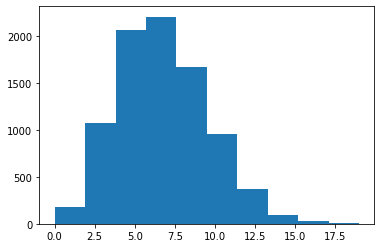

In [59]:
# целевые
count_stat(df['pre_bigram_count'][df.Bert_embed_K_means_3_clusters==1].values.tolist())

максимальная частота упоминания н-граммы в текстах 16
минимальная частота упоминания н-граммы в текстах 0
средняя частота упоминания н-граммы в текстах 1.7726622960516587
модальная частота упоминания н-граммы в текстах 0
стандартное отклонение частоты упоминания н-граммы в текстах 2.084566899985728


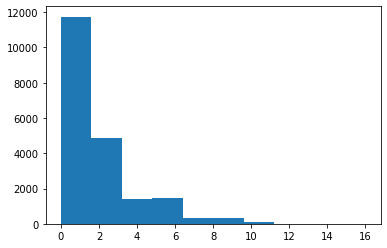

In [60]:
# нецелевые
count_stat(df['pre_bigram_count'][df.Bert_embed_K_means_3_clusters!=1].values.tolist())

In [61]:
# и по графикам видно что биграммы подобраны хорошие. но надо выбрать так 
#чтобы они однозначно или по крайней мере с высокой вероятностью определяли
#нужный текст
#исходя из графиков то можно выбрать 16 чтобы было больше максимального.
#pre_bigram - биграмы которые чаще встречаются в целевых текстах

In [74]:
pre_bigram_count=8
print(f'сколько целевых текстов содержит больше {pre_bigram_count} пре-целевых нграмм: {len(df[(df.Bert_embed_K_means_3_clusters ==1)&(df.pre_bigram_count>pre_bigram_count)])}')
print(f'сколько нецелевых текстов содержит больше {pre_bigram_count} пре-целевых нграмм: {len(df[(df.Bert_embed_K_means_3_clusters !=1)&(df.pre_bigram_count>pre_bigram_count)])}')

сколько целевых текстов содержит больше 8 пре-целевых нграмм: 2216
сколько нецелевых текстов содержит больше 8 пре-целевых нграмм: 219


In [75]:
# если сделаем порог по эти биграммам в 8, то с вероятностью 90% разметка будет правильна

In [76]:
# какой прирост даст правило
print(f'сколько целевых текстов не обрабатывается целевыми нграммами: {len(df[(df.Bert_embed_K_means_3_clusters ==1)&(df.uniq_aim_ngrams==0)])}')
print(f'сколько целевых текстов не обработанных целевыми нграммами обрабатывает пре-целевыми нграммами с заданными порогом: {len(df[(df.Bert_embed_K_means_3_clusters ==1)&(df.uniq_aim_ngrams==0)&(df.pre_bigram_count>pre_bigram_count)])}')

сколько целевых текстов не обрабатывается целевыми нграммами: 2969
сколько целевых текстов не обработанных целевыми нграммами обрабатывает пре-целевыми нграммами с заданными порогом: 372


максимальная частота упоминания н-граммы в текстах 14
минимальная частота упоминания н-граммы в текстах 0
средняя частота упоминания н-граммы в текстах 2.691836262719704
модальная частота упоминания н-граммы в текстах 1
стандартное отклонение частоты упоминания н-граммы в текстах 2.20166616643742


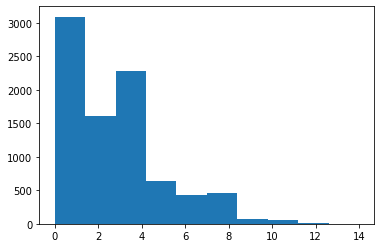

In [77]:
count_stat(df['pre_tergram_count'][df.Bert_embed_K_means_3_clusters==1].values.tolist())

максимальная частота упоминания н-граммы в текстах 13
минимальная частота упоминания н-граммы в текстах 0
средняя частота упоминания н-граммы в текстах 0.601025287129689
модальная частота упоминания н-граммы в текстах 0
стандартное отклонение частоты упоминания н-граммы в текстах 1.239471332428566


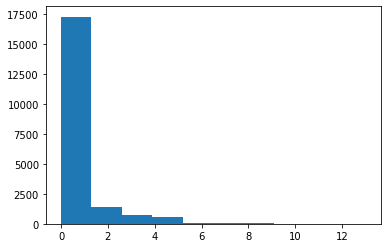

In [78]:
count_stat(df['pre_tergram_count'][df.Bert_embed_K_means_3_clusters!=1].values.tolist())

In [84]:
# c терграммами неинформативно можно перебрать pre_bigram_count. точность не выше 80%
pre_tergram_count=6
print(f'сколько целевых текстов содержит больше {pre_tergram_count} пре-целевых нграмм: {len(df[(df.Bert_embed_K_means_3_clusters ==1)&(df.pre_tergram_count>pre_tergram_count)])}')
print(f'сколько нецелевых текстов содержит больше {pre_tergram_count} пре-целевых нграмм: {len(df[(df.Bert_embed_K_means_3_clusters !=1)&(df.pre_tergram_count>pre_tergram_count)])}')

сколько целевых текстов содержит больше 6 пре-целевых нграмм: 582
сколько нецелевых текстов содержит больше 6 пре-целевых нграмм: 127


максимальная частота упоминания н-граммы в текстах 12
минимальная частота упоминания н-граммы в текстах 0
средняя частота упоминания н-граммы в текстах 0.6154024051803886
модальная частота упоминания н-граммы в текстах 0
стандартное отклонение частоты упоминания н-граммы в текстах 1.1845652254372547


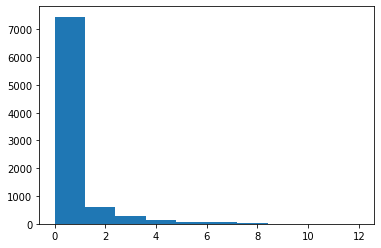

In [85]:
count_stat(df['pre_fourgram_count'][df.Bert_embed_K_means_3_clusters==1].values.tolist())

максимальная частота упоминания н-граммы в текстах 12
минимальная частота упоминания н-граммы в текстах 0
средняя частота упоминания н-граммы в текстах 0.1603982846157638
модальная частота упоминания н-граммы в текстах 0
стандартное отклонение частоты упоминания н-граммы в текстах 0.6583191754239933


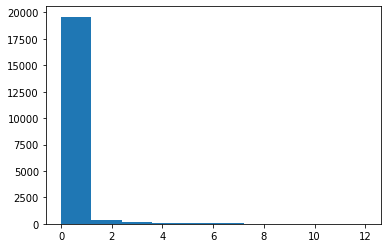

In [86]:
count_stat(df['pre_fourgram_count'][df.Bert_embed_K_means_3_clusters!=1].values.tolist())

In [87]:
# c терграммами неинформативно можно перебрать pre_fourgram_count. точность не выше 50%
pre_fourgram_count=6
print(f'сколько целевых текстов содержит больше {pre_fourgram_count} пре-целевых нграмм: {len(df[(df.Bert_embed_K_means_3_clusters ==1)&(df.pre_fourgram_count>pre_fourgram_count)])}')
print(f'сколько нецелевых текстов содержит больше {pre_fourgram_count} пре-целевых нграмм: {len(df[(df.Bert_embed_K_means_3_clusters !=1)&(df.pre_fourgram_count>pre_fourgram_count)])}')

сколько целевых текстов содержит больше 6 пре-целевых нграмм: 51
сколько нецелевых текстов содержит больше 6 пре-целевых нграмм: 36


максимальная частота упоминания н-граммы в текстах 11
минимальная частота упоминания н-граммы в текстах 0
средняя частота упоминания н-граммы в текстах 0.16211840888066606
модальная частота упоминания н-граммы в текстах 0
стандартное отклонение частоты упоминания н-граммы в текстах 0.7231718785999898


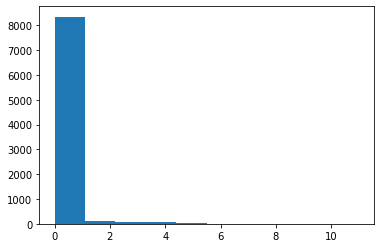

In [88]:
count_stat(df['pre_fivegram_count'][df.Bert_embed_K_means_3_clusters==1].values.tolist())

максимальная частота упоминания н-граммы в текстах 10
минимальная частота упоминания н-граммы в текстах 0
средняя частота упоминания н-граммы в текстах 0.05234879479469611
модальная частота упоминания н-граммы в текстах 0
стандартное отклонение частоты упоминания н-граммы в текстах 0.4219775415731911


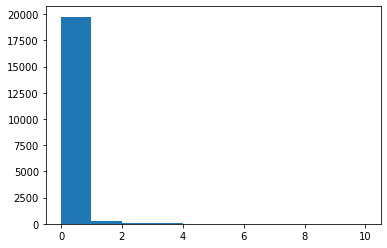

In [89]:
count_stat(df['pre_fivegram_count'][df.Bert_embed_K_means_3_clusters!=1].values.tolist())

In [90]:
# c терграммами неинформативно можно перебрать pre_fourgram_count. точность не выше 10%
pre_fivegram_count=2
print(f'сколько целевых текстов содержит больше {pre_fivegram_count} пре-целевых нграмм: {len(df[(df.Bert_embed_K_means_3_clusters ==1)&(df.pre_fivegram_count>pre_fivegram_count)])}')
print(f'сколько нецелевых текстов содержит больше {pre_fivegram_count} пре-целевых нграмм: {len(df[(df.Bert_embed_K_means_3_clusters !=1)&(df.pre_fivegram_count>pre_fivegram_count)])}')

сколько целевых текстов содержит больше 2 пре-целевых нграмм: 185
сколько нецелевых текстов содержит больше 2 пре-целевых нграмм: 124


In [91]:
#потому предлагаю только биграммы
pre_aim_bigrams_list=list(pre_aim_bigrams.keys())

In [92]:
with open(r'./data/besprovodnaya_svyaz__0_95_classification_pre_aim_ngrams.txt', 'w') as fp:
    for item in all_aim_ngrams:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


# Rule based part

In [94]:
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text= re.sub(r'%', ' percent ', text)
    text=re.sub('\$', ' dollar ', text)
    text=re.compile('<.*?>').sub(' ', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', ' ', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text)
    text = re.sub('\s+', ' ', text)  
    return text

In [95]:
not_informative_short_words =['aaa', 'acc', 'abi', 'add', 'adt', 'aec', 'afp', 'ana', 'aol', 'apr', 'arc', 'ars', 'ash', 'atm',
                              'aud', 
                              'aug', 'avr', 'awp', 'bay', 'bbm', 'bcc', 'bci', 'ben', 'ble', 'bmi', 'boo', 'cad', 'cap', 'cbs', 
                              'ccd', 'ccp', 'ccs', 'cds', 'cee', 'ces', 'cfo', 'cgi', 'cis', 'cld', 'cns', 'cny', 'cpa', 'cta', 
                              'cto', 'cub', 'cup', 'daf', 'dan', 'daz', 'dci', 'ddr', 'dev', 'dew', 'dfc', 'dgx', 'dip', 'dlc', 
                              'dpb', 'dpi', 'dre', 'eap', 'ebt', 'eco', 'edr', 'eli', 'ems', 'eon', 'eos', 'epa', 'era', 'esa', 
                              'esi', 'etc', 'etf', 'evo', 'faa', 'fab', 'fax', 'fda', 'fed', 'fee', 'fig', 'fis', 'fla', 'fov', 
                              'gag', 'gcg', 'gdp', 'gfk', 'ghz', 'gic', 'glu', 'gos', 'gsm', 'gta', 'gtc', 'gtg', 'gtx', 'hai', 
                              'hbo', 'hed', 'hes', 'hfr', 'hlm', 'hlp', 'hmd', 'hmi', 'hon', 'htv', 'hub', 'hud', 'iab', 'iae', 
                              'ian', 'iap', 'ibd', 'ibm', 'ics', 'idc', 'idg', 'ifa', 'ign', 'igt', 'ihs', 'iii', 'imu', 'inc', 
                              'ind', 'int', 'ion', 'iot', 'ips', 'ise', 'isp', 'iss', 'ive', 'iyl', 'jio', 'jmi', 'jon', 'jun', 
                              'jwn', 'khz', 'kit', 'kwh', 'lab', 'lap', 'las', 'lbe', 'lcd', 'led', 'lgs', 'liu', 'low', 'lpm', 
                              'lrn', 'ltd', 'lte', 'lti', 'lux', 'mah', 'met', 'mhl', 'mid', 'mlg', 'mmo', 'mpg', 'mph', 'mrc', 
                              'mri', 'msc', 'msm', 'msv', 'nab', 'nba', 'nbc', 'nea', 'nfl', 'ngr', 'nov', 'nox', 'npd', 'nsf', 
                              'nsn', 'ntt', 'nuc', 'nzd', 'oak', 'oct', 'odv', 'oem', 'ohm', 'ooh', 'opi', 'opt', 'ore', 'org', 
                              'owc', 'par', 'pbr', 'pci', 'pcs', 'pct', 'phd', 'pic', 'plc', 'ppb', 'ppd', 'ppi', 'ppm', 'pre', 
                              'prn', 'pwc', 'qct', 'qqq', 'qsi', 'qtl', 'rec', 'rig', 'rim', 'rmb', 'roy', 'rpm', 'rtx', 'rue', 
                              'sad', 'sam', 'sas', 'sci', 'sek', 'shp', 'skf', 'sne', 'soc', 'spx', 'sqm', 'srp', 'stx', 'sub', 
                              'swp', 'tap', 'tcl', 'tel', 'tfe', 'thd', 'tim', 'tmr', 'tri', 'tvs', 'uav', 'ubi', 'uhd', 'uks', 
                              'usc', 'utm', 'uva', 'uvb', 'vcs', 'vfr', 'vic', 'von', 'vrd', 'vrs', 'vrx', 'wen', 'wii', 'win', 
                              'wow', 'wwe', 'wwf', 'xie', 'xlk', 'yaw', 'yoy', 'zhu', 'zvi',
                              'aal', 'aap', 'abb', 'abd', 'abp','abu', 'aci', 'acm', 'act', 'ada', 'adi', 'adl', 'adn', 'adr', 
                              'ads', 'aed', 'aeg', 'aep', 'aer', 'afr', 'agg', 'agm', 'agr', 'aha', 'ahs', 'aid', 'aii','ais',
                              'aka', 'ala', 'ali', 'alp', 'als', 'amc', 'ami', 'amn', 'amp', 'amr', 'amt', 'and', 'ant', 'anz',
                              'aok', 'api', 'app', 'aps', 'ari', 'asp', 'asu', 'asx', 'atc', 'ate', 'ati', 'atl', 'atp', 'att',
                              'atw', 'awd', 'aws', 'bac','bbb', 'bbc', 'bbk', 'bcd', 'bce', 'bch', 'bcs', 'bdt', 'beh', 'bet', 
                              'bhp', 'bia', 'bid', 'bif', 'big', 'bin', 'bip', 'bit', 'bli', 'bln', 'blu', 'bmo', 'bms', 'bmw',
                              'bns', 'bpd', 'bpi', 'bpo', 'bps', 'brl', 'bse', 'bss', 'btc', 'bts', 'btu', 'buf', 'bui','bwa', 
                              'byo', 'cae', 'caf', 'cak', 'cbp', 'ccg', 'cch', 'cci', 'ccl', 'cdc', 'cdn', 'cea', 'cem','cfe',
                              'cfs', 'cfu', 'cfx', 'cgo', 'cha', 'chd', 'chf', 'chi', 'chl', 'cho', 'chu', 'cia', 'cin', 'cio',
                              'cit', 'ckd', 'cle', 'clp',  'cmk', 'cmo', 'cmr', 'cms', 'cmt', 'cnb', 'cnc', 'cng', 'cnw', 'com',
                              'con', 'coo','co₂', 'cpc', 'cpe', 'cph', 'cpi', 'cps','cpv', 'cpw', 'crm', 'cry', 'cse', 'csl', 
                              'csm', 'csp', 'csr', 'css', 'cus', 'cut', 'cvc', 'cvg', 'cyn', 'czk', 'dab', 'dal', 'dam', 'das',
                              'dax',  'dbs', 'dcg', 'dcm', 'dda', 'ddh', 'ddt', 'dec', 'del', 'den', 'der', 'des', 'det', 'dft',
                              'dha', 'dhl', 'dhq', 'dig', 'div', 'diy', 'djb', 'dld', 'dlr', 'dmi', 'dmr', 'dna', 'dng', 'doe',
                              'dou', 'dow', 'dsc', 'dsl', 'dso', 'dsp', 'dtc', 'dth', 'dtl', 'dts', 'dtw', 'due', 'dug', 'duo',
                              'dvb',  'dvr', 'dxb', 'eas','ebs', 'eda', 'edm', 'edt', 'eee', 'ees', 'efb', 'egp', 'ehr', 'ehs',
                              'eia', 'eid', 'eir', 'emc', 'emd', 'emi', 'emt', 'emv', 'end', 'eno', 'ent', 'epc', 'epi',  'eqb',
                              'erc', 'ers', 'eso', 'est', 'etb', 'etd', 'ett', 'eur', 'eus', 'evf', 'evm', 'evs', 'ewj', 'ews',
                              'eye', 'fao', 'fat', 'fba', 'fca', 'fcc', 'fcf', 'fci', 'fcs', 'fdi', 'fdn', 'feb', 'fgw','flo',
                              'fly', 'fmc', 'fmi', 'fni', 'fon','fsa', 'fsi', 'fss', 'fst', 'ftc', 'ftr', 'fun', 'fwa', 'fxi', 
                              'gaa', 'gal', 'gan', 'gao', 'gba', 'gbe', 'gby', 'gcf', 'gee', 'gen', 'ges', 'get', 'gfg', 'ggv',
                              'ghg', 'ghs', 'gif', 'gig', 'giv', 'gla', 'gmt', 'gmv', 'gni', 'gnw', 'gpv', 'grm', 'gru', 'gsa',
                              'gsi', 'gsk', 'gst', 'gth', 'gtm', 'gto', 'gun', 'guo', 'gut', 'gva', 'gvt', 'gwe', 'gwh', 'gør',
                              'han', 'har', 'hat', 'hba', 'hbb', 'hcc', 'hcl', 'hdb', 'hdd', 'hdi', 'hdr', 'hdx', 'hem', 'hev', 
                              'hex', 'hey', 'hfc', 'hia', 'hip', 'hit','hkd', 'hkx', 'hlr', 'hns', 'hos', 'hou', 'hpc', 'hpe',
                              'hpj', 'hps', 'hrb', 'hrs', 'htc', 'hts', 'htt', 'hua', 'høy', 'iac', 'ibs', 'ibw', 'ica', 'icn',
                              'icp', 'ict', 'ida', 'idf', 'idh', 'idp', 'idx', 'ied', 'iee', 'ift', 'igr', 'igv', 'iia', 'iin', 'ijj',
                              'ill', 'imf', 'img', 'imo', 'ims', 'ina', 'ing', 'ink', 'inn', 'inr', 'ins', 'ioc', 'ioe', 'ios', 'ipc',
                              'ipd', 'ipo', 'ipr', 'ipv', 'ipx', 'iri', 'irs', 'isi', 'ism', 'itc', 'itm', 'itu', 'itv', 'iuc', 'iwd',
                              'iwf', 'iwr', 'iyt', 'izy', 'jam', 'jan', 'jet', 'jfk', 'jgp', 'jim', 'job', 'jpr', 'jpy', 'jqh', 'jsc',
                              'jui', 'jul', 'kan', 'kfc', 'kgi', 'kgs', 'kid', 'kik', 'kim', 'kkr', 'kla', 'klm', 'kmi', 'kms', 'km²',
                              'koa', 'kph', 'kpn', 'krw', 'kse', 'kts', 'kun', 'kuo', 'kva', 'kvh', 'kwd', 'laa', 'lag', 'lam', 'lan',
                              'lat', 'law', 'lay', 'lbs', 'lcc', 'lce', 'lco', 'lda', 'ldc', 'lee', 'les', 'let', 'lex', 'lgb', 'lie',
                              'lis', 'lla', 'llc', 'lmc', 'lmr', 'lng', 'log', 'loi', 'lok', 'los', 'lot', 'lpg', 'lps', 'lrs', 'lse', 
                              'lsi', 'lsp', 'lsr', 'ltm', 'lui', 'luk', 'lum', 'luo', 'lyf', 'lzo', 'lzt', 'mab',  'mag', 'man',
                              'map', 'mar', 'mat', 'mau','mbb', 'mbs', 'mbu', 'mca', 'mcd', 'mcm', 'mco', 'mdd', 'mdg', 'mdm', 'mdr', 'mea',
                              'med', 'mee', 'mem',  'meq', 'mfi', 'mhi', 'mhs', 'mhz', 'mic', 'mik', 'mil', 'mim',  'mio', 'mir', 'mis',
                              'mit', 'mix', 'mjn', 'mln', 'mms', 'mmt', 'mnf', 'mno', 'mnp', 'mod', 'mog', 'mom', 'mos', 'mou', 'moz',    
                              'mpa', 'mpc', 'mpd', 'mps', 'mrm', 'mro', 'mrp', 'msa', 'msi', 'msn', 'mss', 'mst', 'mtg', 'mtl', 'mtn', 'mts',
                              'mvp', 'mwc', 'mwh', 'máv', 'nas', 'nbn', 'ncr', 'nec', 'net', 'new', 'nfc', 'nff', 'nfv', 'ngh', 'nhk', 'nhn',
                              'nhs', 'nis', 'nok', 'non', 'npt', 'nre', 'nrf', 'nrg', 'nse', 'nsl', 'nsr', 'nsw', 'ntc', 'ntd', 'ntf', 
                              'ntp', 'ntv', 'nwe', 'nws', 'nxp', 'nxt', 'nyg', 'nyj', 'obd', 'obr', 'obs', 'ocf', 'och', 'ocs', 'odd',
                              'odm', 'oee', 'oes', 'ohb', 'oie', 'oil', 'old', 'one', 'ono', 'ons', 'ont', 'orc', 'oro', 'orr', 'osa',
                              'osk', 'ota', 'otc', 'ott', 'owe', 'oza', 'pac', 'pad', 'pan','pbs', 'pbx', 'pcb', 'pch', 'pcl', 'pcp',
                              'pds', 'pdv', 'peg', 'per', 'pet', 'pew', 'pgh', 'phe', 'phl', 'pie', 'pig', 'pin', 'pit', 'pkr', 'pla',
                              'pld', 'plm', 'pls', 'ply', 'pme', 'pnb', 'pod', 'pop', 'pos', 'pot', 'ppg', 'ppp', 'pps', 'ppv', 'prc',
                              'pro', 'prp', 'psg', 'psi', 'psy', 'pta', 'ptp', 'pts', 'pub', 'put', 'pvc', 'pyg', 'qad', 'qar',
                              'qcc', 'qfy', 'qhd', 'qnx', 'qoq', 'qvc', 'rac', 'raj', 'ram', 'ran', 'raw', 'ray', 'rba', 'rbc',
                              'rbi', 'rca', 'rcr', 'rcs', 'rda', 'rdd', 'red', 'ree', 'ren', 'rev', 'rex', 'rey', 'rgb', 'rgu', 
                              'rhi', 'rid', 'ril', 'rio', 'rkg', 'rmg', 'rmi', 'rmr', 'roa', 'roc', 'rod', 'roe', 'rog', 'roi',
                              'rom', 'ron', 'rov','rrb', 'rrh', 'rsa', 'rse', 'rsi', 'rtk', 'rub', 'run', 'rwc', 'saf', 'san',
                              'sao', 'sap', 'sar', 'sat','sba', 'sbc', 'sbi', 'sbo', 'sce', 'scs', 'sdg', 'sdn',
                              'sea', 'sec', 'see', 'sel', 'sen', 'sep', 'ses', 'set', 'sex', 'sfr', 'sgt', 'sgx', 'shy', 
                              'sia', 'sim', 'sis', 'sit', 'siy', 'ski', 'skm', 'skt', 'sky', 'slp', 'smb', 'sme', 'smg',
                              'smh', 'smk', 'smp', 'sms', 'smt', 'sns', 'soi', 'sol', 'som', 'son', 'sot', 'soy', 'spg',
                              'sph', 'spi', 'spy', 'sri', 'ssa', 'ssd', 'sse', 'ssl', 'ssm', 'std', 'stl', 'stp', 'sts',
                              'stv', 'suc', 'sud', 'sui', 'sum', 'sun', 'sur', 'suv', 'svp', 'svw', 'tab', 'tac', 'tad',
                              'tag', 'tal', 'tam', 'tan', 'tas',  'tbr', 'tbs', 'tcf', 'tcm', 'tco', 'tcs', 'tdd',
                              'tdi', 'tdk', 'tec', 'tek',  'ter', 'tex', 'tfa', 'tft', 'the', 'thz', 'tie', 'til', 
                              'tio', 'tip', 'tis', 'tls', 'tms', 'tom', 'ton', 'tpg', 'tpv', 'tpy', 'tre', 'try', 
                              'tsa', 'tse', 'tsr', 'tuc', 'tvb', 'tvc', 'twc', 'twh', 'two', 'txn', 'uae', 'uah', 
                              'ual', 'ubm', 'ubs', 'ucs', 'ufs', 'uhf', 'uhs', 'ulm', 'umc', 'und', 'une', 'upc', 
                              'upi', 'upm', 'ups', 'uqc', 'ure', 'usa', 'usb', 'usd', 'use', 'usf', 'uss', 'usv', 
                              'val', 'van', 'var', 'vas', 'vat', 'vdc', 'vdd', 'ver', 'vfc', 'vha', 'vhf', 'via',
                              'vil', 'vis', 'vnf', 'vni', 'voc', 'vod', 'vpn', 'vrf', 'vtr', 'vzw', 'wal', 'wan',
                              'wap', 'war', 'wav', 'wba', 'web', 'wed', 'wes', 'wet', 'wls', 'wos', 'wpc'
                              , 'wsj', 'wsn', 'wtg', 'www', 'xad', 'xfi', 'xia', 'xin', 'xlv', 'xmi', 'xps', 'xrp',
                              'xue', 'xzz', 'yds', 'yea', 'yen', 'yep','yfm', 'yin', 'ysa', 'ytd', 'yum', 'yun', 'zal',
                              'zee', 'zem', 'zte', 'zto',
                             'aao','abt', 'aca', 'acd', 'ach', 'ack', 'acl', 'acn', 'aco', 'acr', 'acs', 'acv', 'adb', 'adj', 'ado', 
                              'adp','aes', 'aet', 'afl', 'agc', 'agh', 'agi', 'agn','ags', 'agv', 'ahn', 'ahu', 'aig', 'alm', 'alt', 'ama',
                              'ame', 'aml', 'ams', 'amv', 'amy', 'anc','ann', 'aoc', 'aog', 'aon', 'aov', 'apa', 'apd', 'apl', 'apm', 'aqr',
                              'arr','asa', 'asc', 'asd', 'asm', 'asr', 'ata', 'atd', 'ato', 'auf', 'aum','avx', 'awe', 'axa', 'ayx', 'baa',
                              'bam', 'ban', 'bao', 'bar', 'bax', 'bba', 'bbl', 'bca', 'bcf', 'bcm', 'bct', 'bda', 'bdc',
                              'bdo', 'bds', 'bec','bep', 'bgc', 'bgf', 'bgr', 'bhi', 'bim', 'bio', 'bis', 'biu', 'biz', 'bjh', 'bjp',
                              'bjs', 'bkc', 'bkw', 'bls', 'bmc', 'bnp', 'bob', 'boe', 'bol','bpl', 'bpm', 'bpt', 'bra', 'bsa', 'bsi', 'bsv',
                              'bsx', 'bti', 'btl', 'bto', 'btw', 'bud', 'buz', 'bwc', 'cab', 'cac', 'cba', 'cbd', 'cbi', 'cbm', 'cca', 'ccb', 
                              'ccc', 'ccm', 'ccr', 'cdg', 'cdi', 'cdk', 'cdo', 'cdw', 'cdx', 'ceb', 'cec', 'cef', 'cel', 'cep', 'cet', 'cgm',
                              'cgn', 'che', 'cic', 'cke', 'cli', 'cma', 'cme', 'cmf', 'cmi', 'cml', 'cmu', 'cnk', 'cnn', 'cnt', 'cod', 'col',
                              'cor', 'cos','cpg', 'cpm', 'cpo', 'cpp', 'cpr', 'cpt', 'cpu', 'crc', 'cro', 'crv', 'csa', 'csd', 'csf', 'csi',
                              'cso', 'ctd', 'cti', 'ctr', 'cue', 'cuh', 'cvd', 'cvs', 'cwc', 'cxa', 'cxu', 'cys', 'dag', 'dai', 'dao', 'dau',
                              'dbr', 'dcc', 'dco', 'dcp', 'dds', 'dee', 'dei', 'dem', 'dfj', 'dfm', 'dhe', 'dia', 'dif', 'dik', 'dim', 'dkk', 
                              'dkr', 'dlp', 'dls', 'dmc', 'dme', 'dmf', 'dmg', 'dms', 'dnb', 'dnf', 'dno', 'doa', 'doc', 'dod', 'doi', 'doj',
                              'dos', 'dpm', 'dpu', 'drg', 'dss', 'dte', 'dtm', 'dto', 'dtt', 'dun', 'dup', 'dut','dvm', 'dvt', 'dxl', 'dye',
                              'eab', 'eam','ecj', 'ecm', 'ecs', 'edf', 'edp', 'eds', 'edu', 'eeg', 'eff', 'efm', 'egg', 'egm', 'ein', 'eiu',
                              'ekg', 'eld', 'elf', 'ema', 'emr', 'eps', 'erm', 'erp', 'erx', 'esd', 'esn', 'esp', 'eth', 'etl', 'eva', 'exa',
                              'ext', 'eys', 'faf','faq', 'far', 'fay', 'fbi', 'fbr', 'fdp', 'fep', 'fet', 'fft', 'fia', 'fin', 'fkf', 'fld',
                              'flg', 'flu', 'fos', 'fou','fpc', 'fpl', 'fps', 'frr', 'frs', 'fse', 'fsr', 'fte', 'ftk', 'ft³', 'fup', 'fyp',
                              'gac','gbi', 'gbp', 'gbs', 'gca', 'gcc', 'gel','ggr', 'ghk', 'gii', 'gle', 'glj', 'gma', 'gms', 'goa','gox', 'gpa',
                              'grc', 'grp', 'gsr', 'gsu', 'gsv', 'guy', 'gvc', 'gwp','hal', 'hbl', 'hbs', 'hci', 'hcm', 'hcq', 'hcs', 'hdl', 'hdp',
                              'hfn', 'hfo', 'hfs', 'hft', 'hhs', 'hie', 'hiv', 'hla', 'hmh', 'hmq', 'hmx', 'hny', 'hoc', 'hot', 'hrc', 'hrd', 'hsn',
                              'htf', 'htm', 'hue', 'hut', 'hvc', 'hya', 'hzb', 'hzi', 'ias', 'ibc', 'ibn', 'ibo', 'icc', 'icd','icf', 'ico', 'icu',
                              'icy', 'idm', 'ids', 'idw', 'ieg', 'ieo', 'ifr', 'ifs', 'ifx', 'igd', 'igm', 'ihc', 'ihl', 'iis', 'ijb', 'ile', 'ime',
                              'ini', 'inv', 'iod', 'iou', 'ipa', 'ipf', 'ipu', 'iqe', 'iqf', 'irc', 'ird', 'irr', 'isc', 'isg', 'ish', 'iso', 'ist',
                              'ito', 'iva', 'ivc', 'ivf', 'ivp', 'ivr', 'ivv', 'ivy', 'iwg', 'iwv', 'ixc', 'iyk', 'iyw', 'jaw', 'jda', 'jek', 'jft',
                              'jha', 'jhu', 'jit', 'jll', 'joe', 'jog', 'joy', 'jpl', 'kai', 'kar', 'kbr', 'ken','kia', 'koc', 'koh', 'kpa', 'kyc',
                              'lal', 'lau', 'lbp', 'lcs', 'ldl', 'len', 'leo', 'lev', 'lfw', 'lgp', 'lib', 'lip', 'lit', 'liv', 'liz', 'llp', 'lns',
                              'lol', 'lpd', 'lpo', 'lpt', 'ltl', 'ltv', 'luc', 'luz', 'léo','mba', 'mcg', 'mch', 'mcp', 'mcu', 'mcx', 'mdt', 'meg',
                              'mes', 'mfp', 'mgi', 'mgm', 'mig', 'min', 'mlb', 'mld', 'mmc', 'mmp', 'mol', 'moo', 'mov', 'moy', 'mpl','msh',
                              'mso', 'msp', 'msw', 'mtf', 'mtr', 'mtu', 'mtv', 'mud', 'mug', 'mum', 'mwe', 'mws', 'myo', 'myq', 'myr', 'nac',
                              'nam', 'nap', 'nav', 'nbj', 'nbv', 'ncm', 'ncs', 'ndp', 'ndr', 'ndt', 'nei', 'neo', 'neu', 'nev', 'nex', 'nfx',
                              'nga', 'ngc', 'ngi', 'ngo', 'ngp', 'ngs', 'nia', 'nic', 'nih', 'nil', 'nir', 'njm', 'nlp', 'nlu', 'nme', 'nmp',
                              'nmr', 'nmt', 'npa', 'npg', 'npr', 'nps', 'npu', 'npv', 'nra', 'nrm', 'nsa', 'nti', 'nut', 'nxj', 'nyc', 'oab',
                              'obn', 'oca', 'oda', 'ofr', 'oht', 'oig', 'oin', 'ola', 'ole', 'omb', 'opm', 'ops', 'osc', 'osi', 'oto','pag',
                              'pak', 'pal', 'pap', 'pas', 'pat', 'pau', 'pav','pcd', 'pce', 'pcu', 'pdc', 'pdf', 'pdm', 'pec', 'pep', 'pfd',
                              'pfe', 'pfi', 'pga', 'pgi', 'phi', 'php', 'phs', 'pii', 'pim', 'piv', 'pjc', 'pln', 'plp', 'pmi', 'pmp', 'pnc',
                              'pnr', 'poo', 'pou', 'ppa', 'ppl', 'ppo', 'prb', 'prm', 'prt', 'psa', 'psp', 'psr', 'pti', 'pty', 'pud', 'pus',
                              'pvd', 'pvo', 'pvs', 'pvt', 'qia', 'qrr', 'qsr', 'qts', 'que', 'rad', 'rao', 'ras','rcm', 'rct', 'ref', 'rei',
                              'rel', 'rem', 'rep', 'rfp', 'rgc', 'rhb', 'ria', 'ris', 'riv', 'rix', 'riz', 'rna', 'rnn', 'rnr', 'rop', 'row',
                              'rpa', 'rpc', 'rpx', 'rtb', 'rte', 'rti', 'rtl', 'rtp', 'ruh', 'rvx', 'rws', 'rxn','sbb', 'sbs', 'scm', 'scp', 
                              'sdi', 'sdk', 'sdl', 'sdm', 'seo', 'seu', 'sfc', 'sfi', 'sfm', 'sfn', 'sga', 'sha', 'shu', 'sic', 'sig', 'sip',
                              'six', 'ska', 'sku', 'sla', 'slb', 'sls', 'smx', 'snf', 'snr', 'soa', 'sob', 'sou', 'sow', 'sox', 'spf', 'spr',
                              'sps', 'sqe', 'sql', 'sqs', 'src', 'srm', 'sro', 'sst', 'stm', 'sto', 'sue', 'sul', 'svb', 'sve', 'svg', 'sya',
                              'syn', 'sys', 'tao', 'tav', 'tax', 'tay', 'tba', 'tbi', 'tca', 'tcp', 'tct', 'tcv', 'tdp', 'tea', 'ted', 'tem',
                              'teo', 'teu', 'tez', 'tfm', 'tgf', 'tha', 'thb', 'the', 'tif', 'tin', 'tka', 'tko', 'tma', 'tmp', 'tmt', 'tmv',
                              'tmw', 'tns', 'tnt', 'tnw', 'toc', 'toe', 'top', 'tor', 'tow', 'toy', 'tpd', 'tpm', 'tpu', 'trp', 'tru', 'tsi', 
                              'tsv', 'tsx', 'tth', 'tty', 'tvh', 'tvm', 'tvt', 'uas', 'ucc', 'ucl', 'udx', 'ugc', 'ugo', 'uhr', 'uia', 'ulg', 
                              'ull', 'umn', 'uns', 'url', 'uth', 'uto', 'uup', 'vbs', 'vca', 'vda', 'vde', 'vdw', 'vea', 'vec', 'vgb', 'vgg', 
                              'vie', 'vig', 'vii', 'vin', 'viv', 'viz', 'vku', 'vms', 'vos', 'vpa', 'vri', 'vrt', 'vte', 'way', 'wbt', 'wcs', 
                              'wee', 'wef', 'weo', 'wer', 'wfc', 'wfe', 'wfm', 'wfo', 'wit', 'wmo', 'wmt', 'wmw', 'wns', 'wpd', 'wpi', 'wpl', 
                              'wpp', 'wsi', 'wta', 'wti', 'wwt', 'xes', 'xgs', 'xlb', 'xly','xor', 'xpo', 'xrf', 'yap', 'yeo','yrd', 'yue', 'yug',
                              'yuk', 'zaf', 'zar', 'zen', 'zev', 'zip', 'zmr', 'zoo', 'zva', 'çok']


In [96]:
# удаление английских частиц и предлогов.
all_stopwords = stopwords.words('english')
def delete_stop_words(string):
    text_tokens = word_tokenize(string)
    tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
    filtered_sentence = (" ").join(tokens_without_sw)
    return filtered_sentence

In [97]:
# замена больших слов, полученных изза ошибок на несколько слов.
def preprocess_words(text):
    text = text.lower()
    text= re.sub('centralgovernment', 'central government', text)
    text= re.sub('incidentsinvolve', 'incidents involve', text)
    text= re.sub('mobilethroughout', 'mobile throughout', text)
    text= re.sub('biometricupdate', 'biometric update', text)
    text= re.sub('advertisementadjuste', 'advertisement adjuste', text)
    text= re.sub('capitalpredicte', 'capital predicte', text)
    text= re.sub('facebookconnectivitythe', 'facebook connectivity the', text)
    text= re.sub('financialsfirst', 'financials first', text)
    text= re.sub('financialsfacebook', 'financials facebook', text)
    text= re.sub('researchnreport', 'research n report', text)
    text= re.sub('accesshealthcare', 'access health care', text)
    text= re.sub('proteusdigitalhealth', 'proteus digital health', text)
    text= re.sub('renewableenergyworld', 'renewable energy world', text)
    text= re.sub('blockingpagefair', 'blocking page fair', text)
    text= re.sub('thesupermariobro', 'the supermario bro', text)
    text= re.sub('basicsmessenger', 'basics messenger', text)
    text= re.sub('communitybrands', 'community brands', text)
    text= re.sub('contributionstensorflow', 'contributions tensorflow', text)
    text= re.sub('opinionsmanagement', 'opinions management', text)
    text= re.sub('increasednumber', 'increased number', text)
    text= re.sub('salaryfinancethe', 'salary finance the', text)
    text= re.sub('securitysolution', 'security solution', text)
    text= re.sub('reduceddependence', 'reduced dependence', text)
    text= re.sub('bupivacaineinjection', 'bupivacaine injection', text)
    text= re.sub('hypersensitivity', 'hyper sensitivity', text)
    text= re.sub('membersaccording', 'members according', text)
    text= re.sub('francisprofessorsir', 'francis professors ir', text)
    text= re.sub('profileprofessor', 'profile professor', text)
    text= re.sub('advertisementtesla', 'advertisement tesla', text)
    text= re.sub('scientificconservation', 'scientific conservation', text)
    text= re.sub('respondentsdown', 'respondents down', text)
    text= re.sub('chatbotfacebook', 'chatbot facebook', text)
    text= re.sub('beforetrademark', 'before trademark', text)
    text= re.sub('marketresearchhub', 'market research hub', text)
    text= re.sub('heavyweightshive', 'heavy weights hive', text)
    text= re.sub('conclusioncitron', 'conclusion citron', text)
    text= re.sub('manufacturingwhich', 'manufacturing which', text)
    text= re.sub('globalfoundries', 'global foundries', text)
    text= re.sub('advertisementgoldman', 'advertisement goldman', text)
    text= re.sub('technologyeverything', 'technology everything', text)
    text= re.sub('coherentmarketinsights', 'coherent market insights', text)
    text= re.sub('advertisementmore', 'advertisement more', text)
    text= re.sub('breakdowndownload', 'break downdownload', text)
    text= re.sub('growthaccording', 'growth according', text)
    text= re.sub('technologytiktok', 'technology tiktok', text)
    text= re.sub('proceedingfacebook', 'proceeding facebook', text)
    text= re.sub('technologysmartphone', 'technology smartphone', text)
    text= re.sub('technologiesresearch', 'technologies research', text)
    text= re.sub('tesseraholdingcorporation', 'tessera holding corporation', text)
    text= re.sub('advertisementoverall', 'advertisement overall', text)
    text= re.sub('oldershausenmoving', 'olders haus enmoving', text)
    text= re.sub('downtimereduction', 'downtime reduction', text)
    text= re.sub('researchandmarket', 'research and market', text)
    text= re.sub('marketsandmarket', 'markets and market', text)
    text= re.sub('declarationduring', 'declaration during', text)
    text= re.sub('qualityexperience', 'quality experience', text)
    text= re.sub('summarycomputing', 'summary computing', text)
    text= re.sub('alliancebernstein', 'alliance bernstein', text)
    text= re.sub('crystaldiskmark', 'crystal diskmark', text)
    text= re.sub('marketandmarket', 'market and market', text)
    text= re.sub('jbknowledge\u200b', 'knowledge', text)
    text= re.sub('qualcomm\x92s', 'qualcomm', text)
    text= re.sub('jvckenwood', 'kenwood', text)
    text= re.sub('broad\xadcast', 'broadcast', text)
    text= re.sub('informationstored', 'information stored', text)
    text= re.sub('facebookalthough', 'facebook although', text)
    text= re.sub('advertisementthe', 'advertisement the', text)
    text= re.sub('playstationnetwork', 'playstation network', text)
    return text

In [99]:
nlp = spacy.load('en_core_web_lg')
def rule_market_growth_claim(string,aim_ngrams,pre_aims_and_borders):
    '''
    string - строка которую надо определить
    aim_ngrams - список нграмм, наличие которых однозначно определяет к целевому классу
    pre_aims_and_borders - список списков вида [[[ngrams],border],[ngrams1],border1],....]
    '''
    success=False # индикатор что это нужный текст
    # сначала вся предобработка как была раньше
    string = preprocess(string)
    string = delete_stop_words(string)
    string = ' '.join( [word for word in string.split() if len(word)>2])
    string = ' '.join( [word for word in string.split() if word not in not_informative_short_words])
    string = preprocess_words(string)
    string = " ".join([token.lemma_ for token in nlp(string)])
    for ngram in aim_ngrams:
        if ngram in string:
            success=True
            return success
    for ngrams_and_borders in pre_aims_and_borders:
        ngrams=ngrams_and_borders[0]
        border=ngrams_and_borders[1] # граница - порог превысив который мы с определенной уверенностью можем скачать что это целевой текст
        counter=0
        for ngram in ngrams:
            if ngram in string:
                counter+=1
                if counter > border:
                    success=True
                    return success
    return success

In [100]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
    accuracy = correct_predictions/len(y_true)
    return accuracy

In [101]:
df = pd.read_excel('data/besprovodnaya_svyaz__0_95_classification.xlsx')
df=df.drop(columns=['area','label','keywords_eng','pub_date','link','probability'],axis=1)
df=df.dropna(axis='index')
df['sentence'] = df['sentence'].astype("string")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28929 entries, 0 to 28934
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sentence  28929 non-null  string 
 1   class     28929 non-null  float64
dtypes: float64(1), string(1)
memory usage: 678.0 KB
None


In [102]:
aim_ngrams_file = open("data/besprovodnaya_svyaz__0_95_classification_aim_ngrams.txt", "r")
aim_ngrams = aim_ngrams_file.read().splitlines()
pre_aim_ngrams_file = open("data/besprovodnaya_svyaz__0_95_classification_pre_aim_ngrams.txt", "r")
pre_aim_ngrams = pre_aim_ngrams_file.read().splitlines()
new_pre_aim_ngrams=[[pre_aim_ngrams,8]]

In [ ]:
# пример
#new_pre_aim_ngrams=[[pre_aim_ngrams,8],[pre_aim_ngrams2,7],......]

In [105]:
df['rule_result']=df.sentence.apply(lambda x: rule_market_growth_claim(x,aim_ngrams,new_pre_aim_ngrams))


In [107]:
df

,sentence,class,rule_result
0,Chairman Eric Xu said Huawei’s sales revenue for 2019 was likely to reach 850 billion yuan (US$121 billion) — up roughly 18 percent from the previous year.,1.0,True
1,The AI and cognitive market in the UAE is set to grow between 25% and 30% year over year in the next two to three years.,1.0,False
2,"Just looking at autonomous vehicles, for example, a latency of 1 millisecond means that data can be shared between cars travelling at 70 miles per hour in 31 millimeters.",0.0,False
3,Chairman Eric Xu said Huawei's sales revenue for 2019 was likely to reach 850 billion yuan (US$121 billion) -- up roughly 18 percent from the previous year.,1.0,True
4,"And in fiscal 2020, it expects this number to grow 7.8% on a year-over-year basis.",1.0,False
5,So Nvidia’s automotive revenue has doubled from $320 million in fiscal 2016 to $640 million in fiscal 2019.,1.0,True
6,Game consoles were added in fiscal 2017.Nvidia’s Tegra revenue rose almost threefold from $559 million in fiscal 2016 to $1.54 billion in fiscal 2019.,1.0,True
7,"Back in fiscal 2016, Nvidia earned 5% of its revenue—or $264 million—from licensing.",1.0,False
8,"Moreover, it’s expected to outperform the market, even in 2019.The WSTS (World Semiconductor Trade Statistics) expects global semiconductor revenue to fall 12.8% in 2019.",1.0,True
9,"The Ericsson Report 2019 estimates 2.6 billion 5G subscriptions globally by 2025, accounting for 29% of all mobile subscriptions at that time.",0.0,False


In [108]:
df['rule_result']=df['rule_result'].apply(lambda x: 1 if x else 0)

In [109]:
df

,sentence,class,rule_result
0,Chairman Eric Xu said Huawei’s sales revenue for 2019 was likely to reach 850 billion yuan (US$121 billion) — up roughly 18 percent from the previous year.,1.0,1
1,The AI and cognitive market in the UAE is set to grow between 25% and 30% year over year in the next two to three years.,1.0,0
2,"Just looking at autonomous vehicles, for example, a latency of 1 millisecond means that data can be shared between cars travelling at 70 miles per hour in 31 millimeters.",0.0,0
3,Chairman Eric Xu said Huawei's sales revenue for 2019 was likely to reach 850 billion yuan (US$121 billion) -- up roughly 18 percent from the previous year.,1.0,1
4,"And in fiscal 2020, it expects this number to grow 7.8% on a year-over-year basis.",1.0,0
5,So Nvidia’s automotive revenue has doubled from $320 million in fiscal 2016 to $640 million in fiscal 2019.,1.0,1
6,Game consoles were added in fiscal 2017.Nvidia’s Tegra revenue rose almost threefold from $559 million in fiscal 2016 to $1.54 billion in fiscal 2019.,1.0,1
7,"Back in fiscal 2016, Nvidia earned 5% of its revenue—or $264 million—from licensing.",1.0,0
8,"Moreover, it’s expected to outperform the market, even in 2019.The WSTS (World Semiconductor Trade Statistics) expects global semiconductor revenue to fall 12.8% in 2019.",1.0,1
9,"The Ericsson Report 2019 estimates 2.6 billion 5G subscriptions globally by 2025, accounting for 29% of all mobile subscriptions at that time.",0.0,0


In [110]:
y_class=df.iloc[0:150,1].values.tolist()
y_class=[int(x) for x in y_class]
y_class

[1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0]

In [111]:
y_pred=df.iloc[0:150,2].values.tolist()
y_pred=[int(x) for x in y_pred]
y_pred

[1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0]

In [113]:
df.to_excel('./data/bespr_zvyaz_result.xlsx')

In [112]:
compute_accuracy(y_class, y_pred)

0.8066666666666666